In [25]:
import numpy as np
import pandas as pn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


We import the necessary libraries.

In [26]:
da=pn.read_csv("C:/Users/KIIT0001/Desktop/database/ki/train.csv")
print(da.tail())
su=pn.read_csv("C:/Users/KIIT0001/Desktop/database/ki/test.csv")
print(su.head())
df=pn.concat([da,su])
df=df.reset_index(drop=True)
print(df.head())
print(df.tail(10))
print(df.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  

Here we check the shape and data of the file.We can see that it has a high number of columns,so we have to carefully choose our features.

In [27]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ..

This gives us plenty of information.For example,we now know the mean of Sale Price which is 180921,Standard Deviation of Sale price which is 79442,it has minimum value of 34900 and its maximum value is 755000, and half the values of Sale Price range from 129975-214000

### Dealing with Null Values

In [28]:
nd=[feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in nd:
    print(feature,df[feature].isnull().mean(),4)


MSZoning 0.0013703323055841042 4
LotFrontage 0.16649537512846865 4
Alley 0.9321685508735869 4
Utilities 0.0006851661527920521 4
Exterior1st 0.00034258307639602604 4
Exterior2nd 0.00034258307639602604 4
MasVnrType 0.605001712915382 4
MasVnrArea 0.0078794107571086 4
BsmtQual 0.02774922918807811 4
BsmtCond 0.028091812264474134 4
BsmtExposure 0.028091812264474134 4
BsmtFinType1 0.027064063035286058 4
BsmtFinSF1 0.00034258307639602604 4
BsmtFinType2 0.027406646111682084 4
BsmtFinSF2 0.00034258307639602604 4
BsmtUnfSF 0.00034258307639602604 4
TotalBsmtSF 0.00034258307639602604 4
Electrical 0.00034258307639602604 4
BsmtFullBath 0.0006851661527920521 4
BsmtHalfBath 0.0006851661527920521 4
KitchenQual 0.00034258307639602604 4
Functional 0.0006851661527920521 4
FireplaceQu 0.48646796848235696 4
GarageType 0.05378554299417609 4
GarageYrBlt 0.05447070914696814 4
GarageFinish 0.05447070914696814 4
GarageCars 0.00034258307639602604 4
GarageArea 0.00034258307639602604 4
GarageQual 0.05447070914696814

We can see the percentage of null values in each attribute and we can see that Alley has over 90% as null values,so we must clean that up by replacing them with 'missing' value

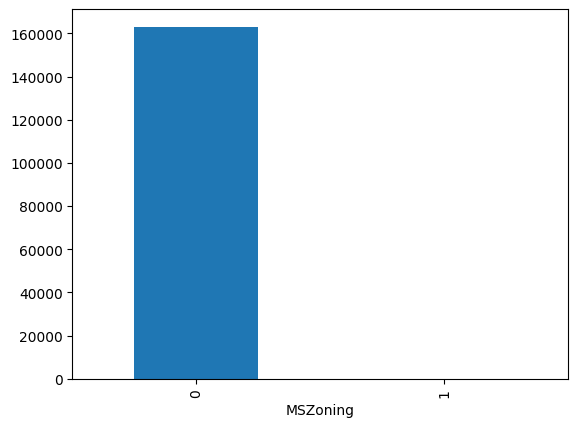

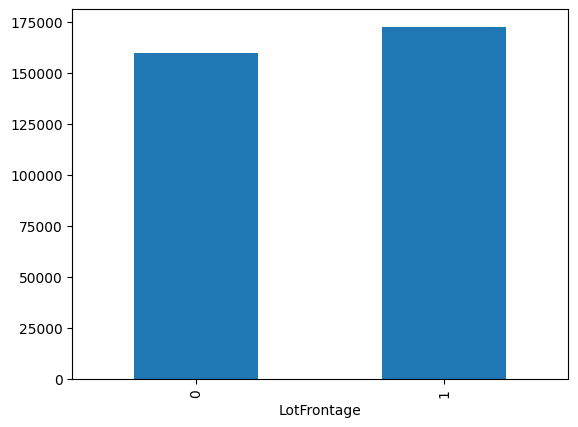

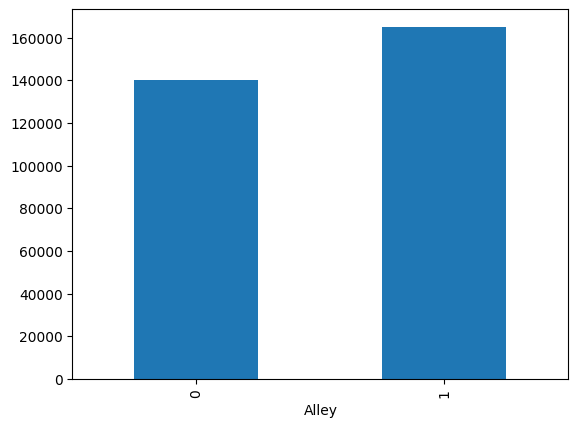

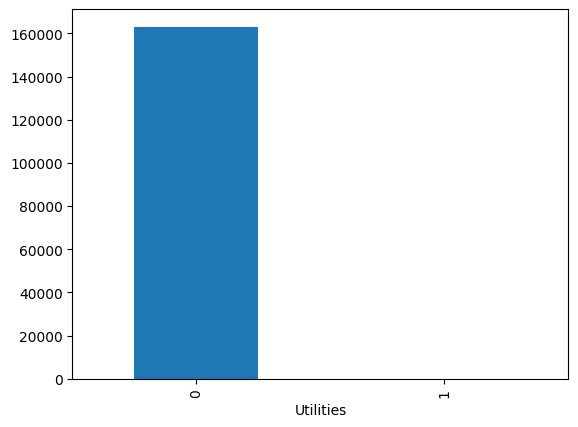

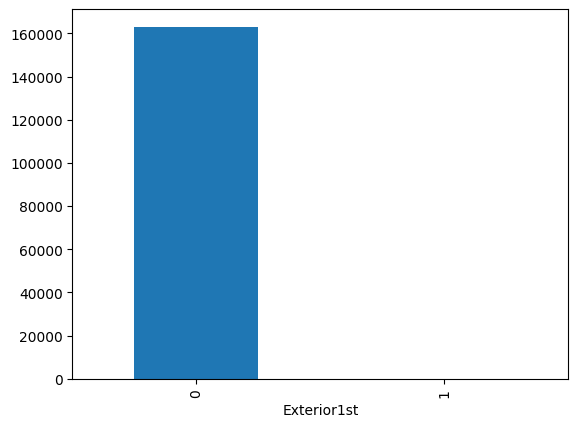

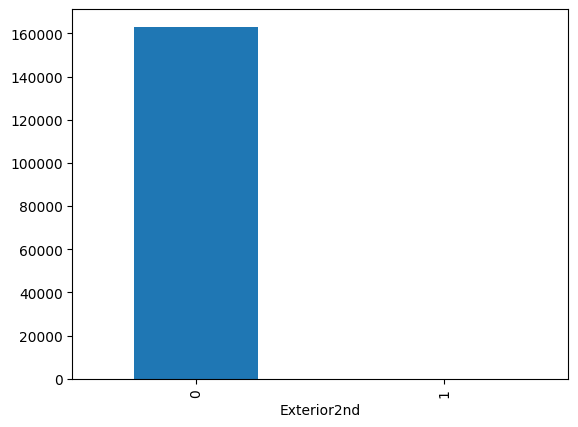

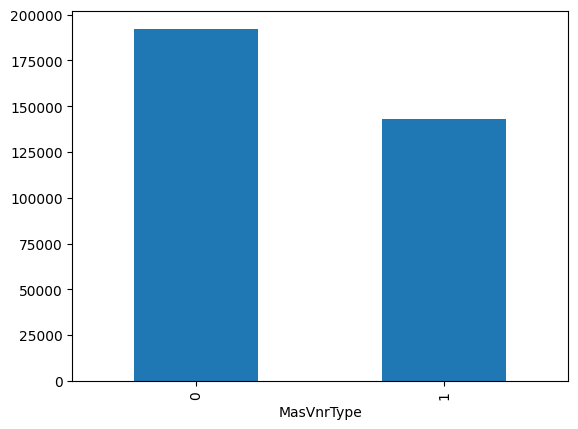

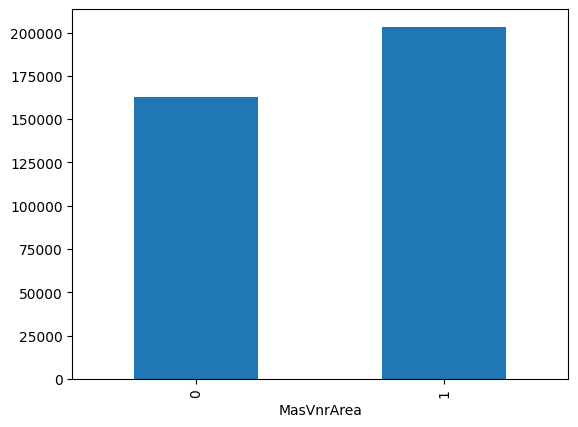

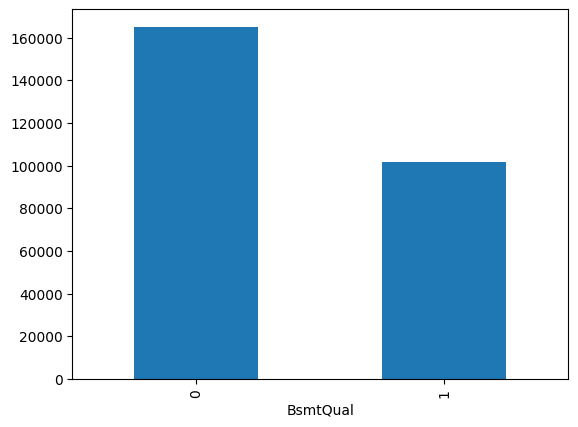

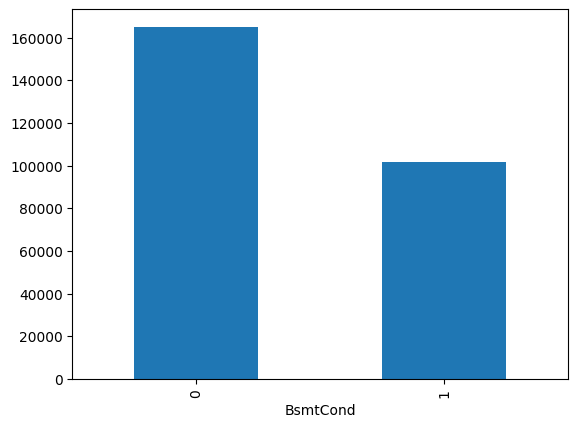

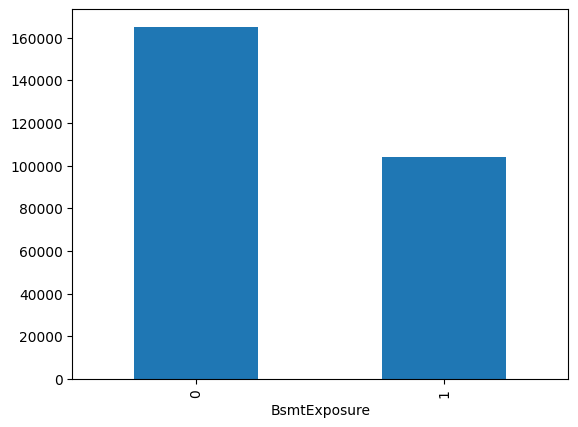

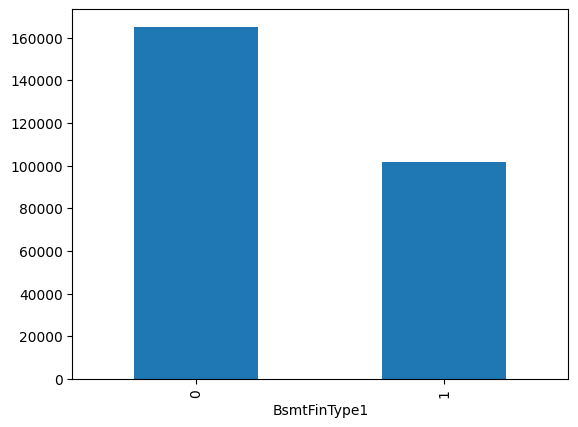

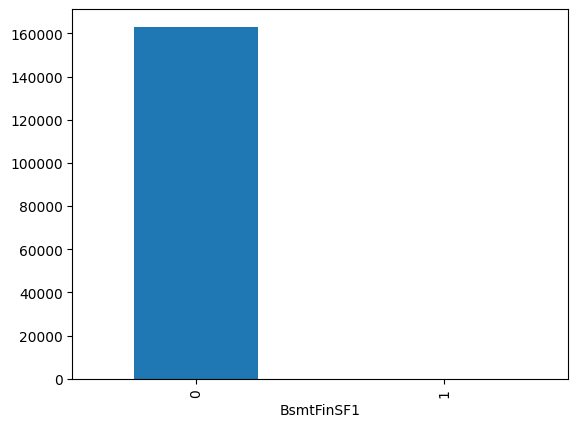

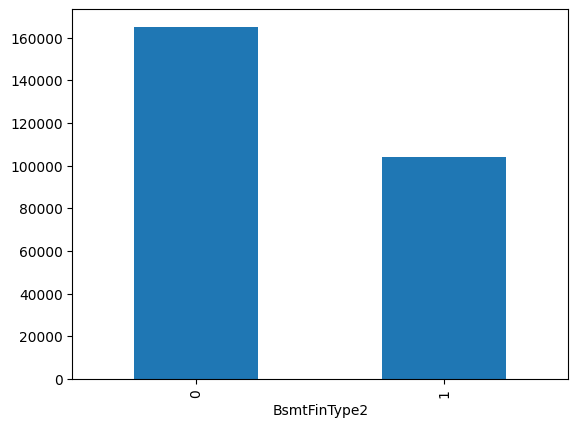

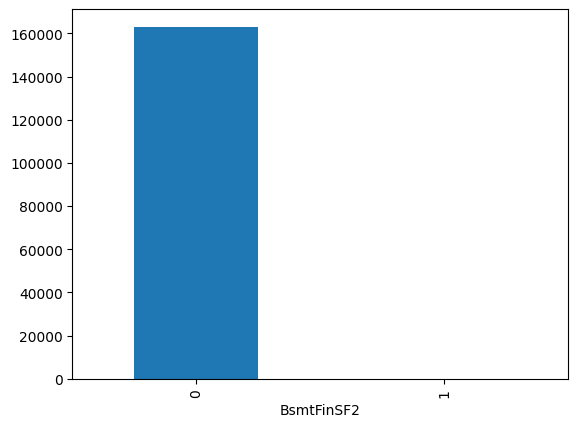

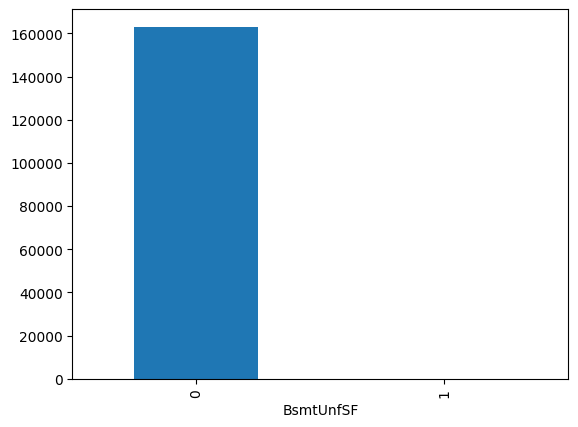

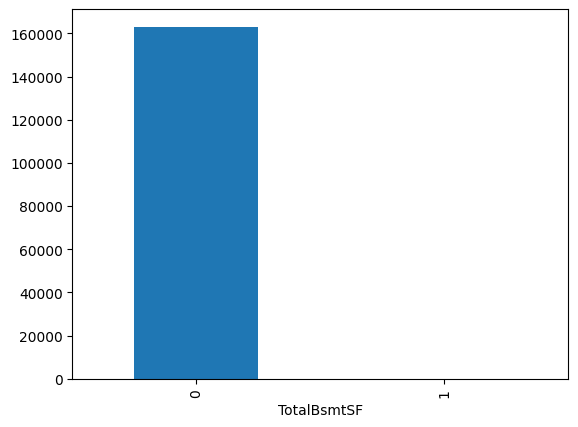

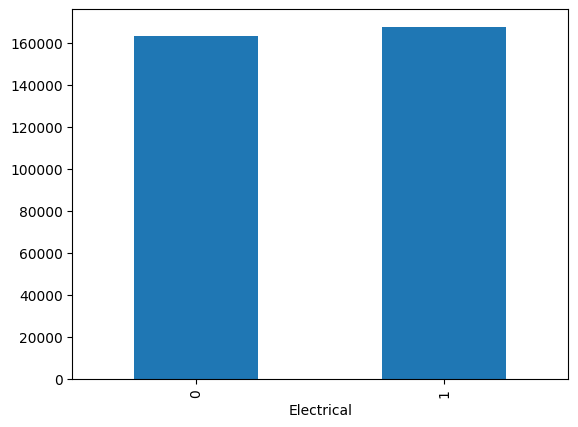

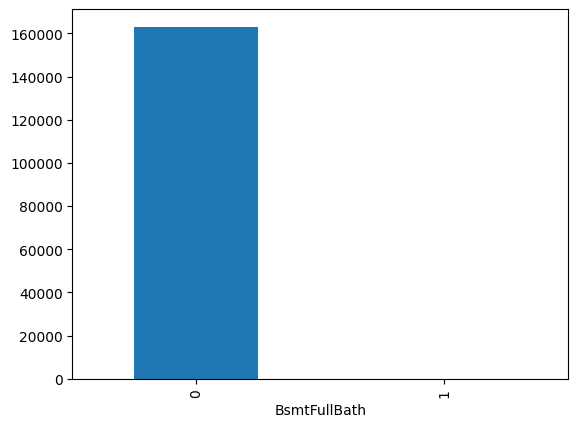

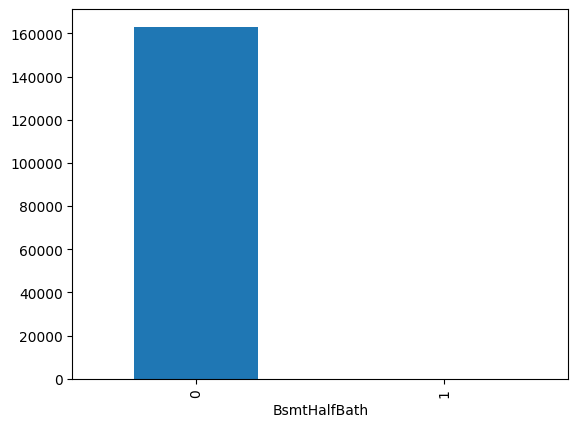

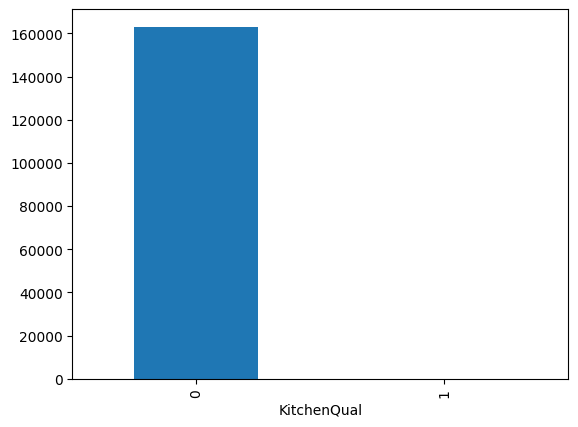

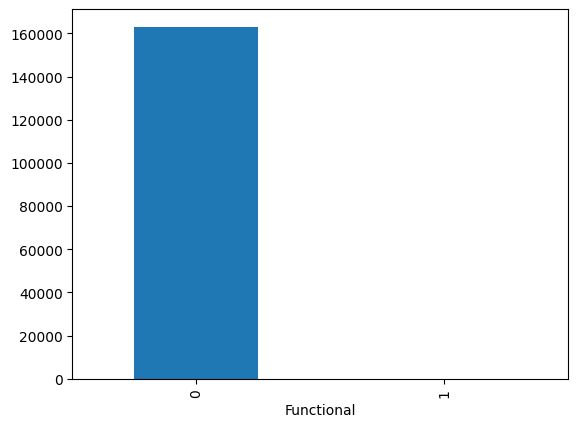

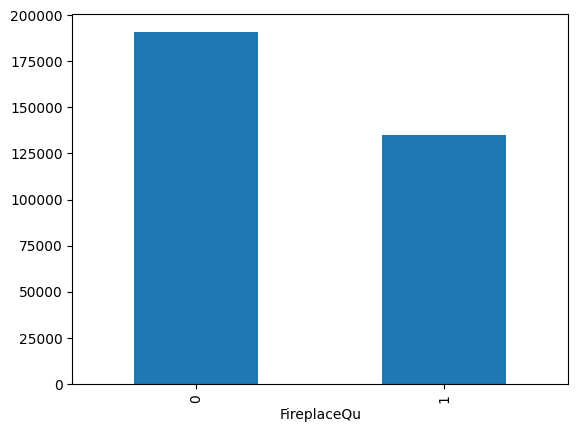

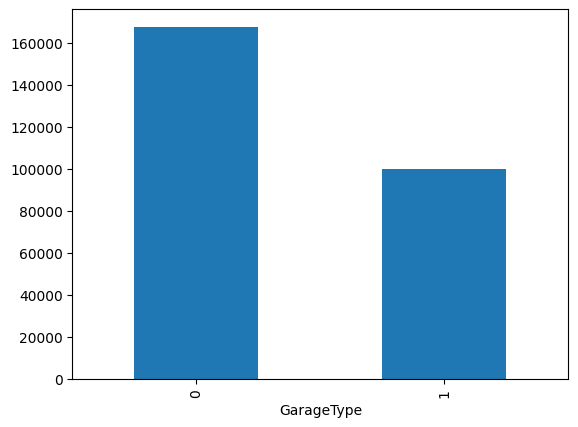

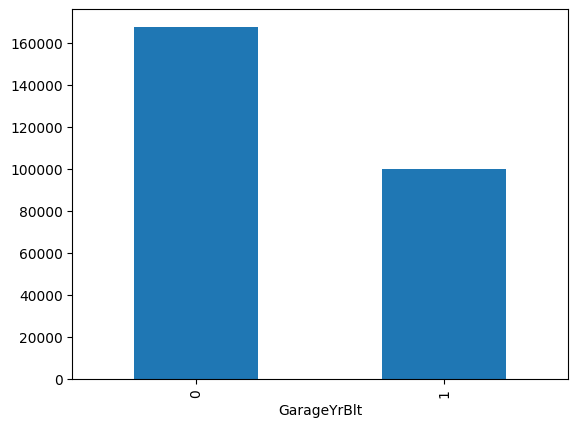

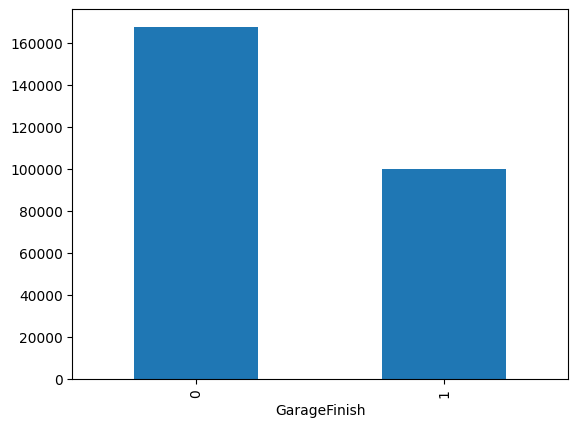

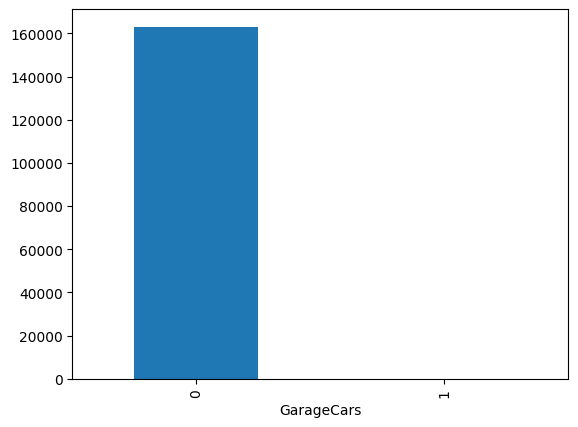

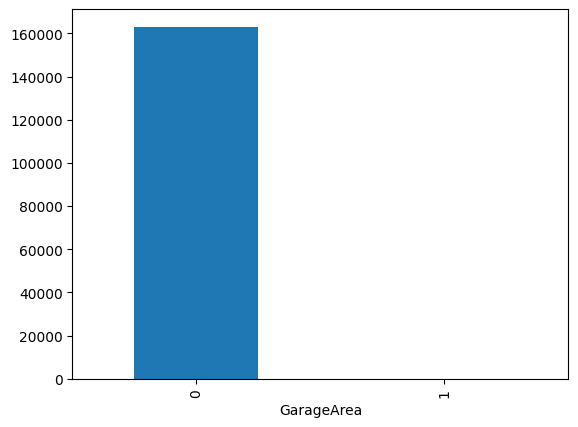

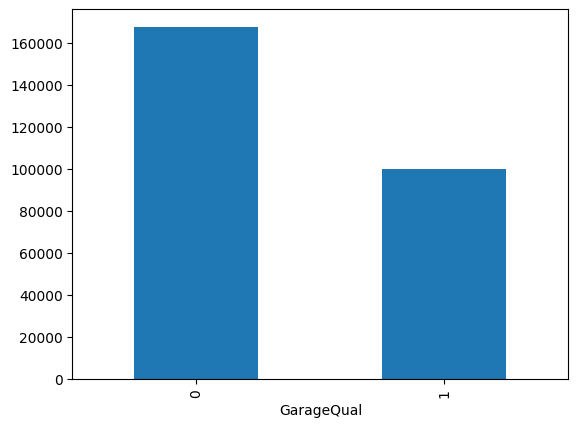

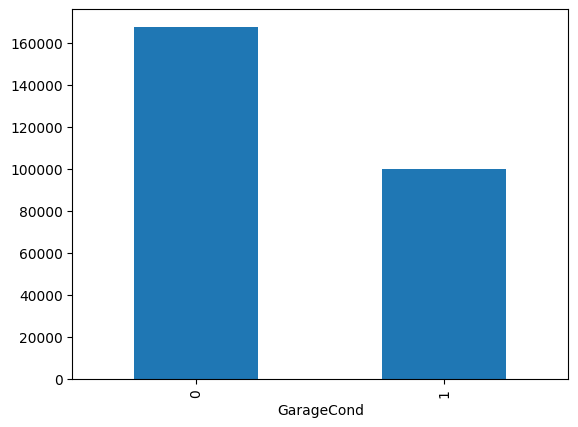

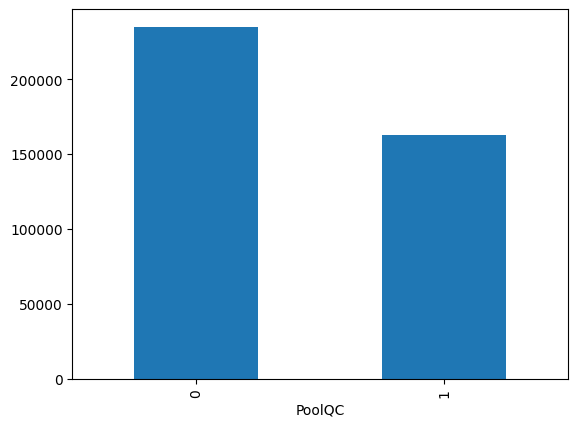

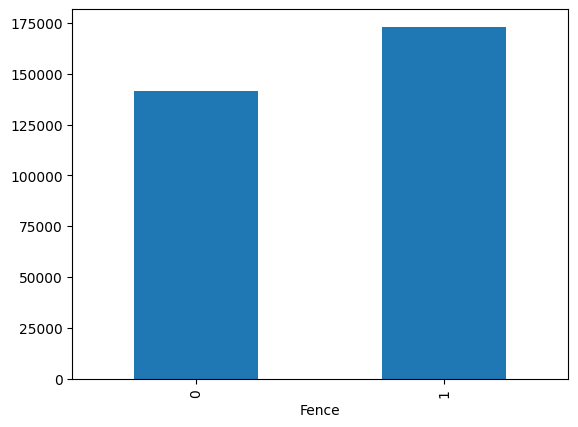

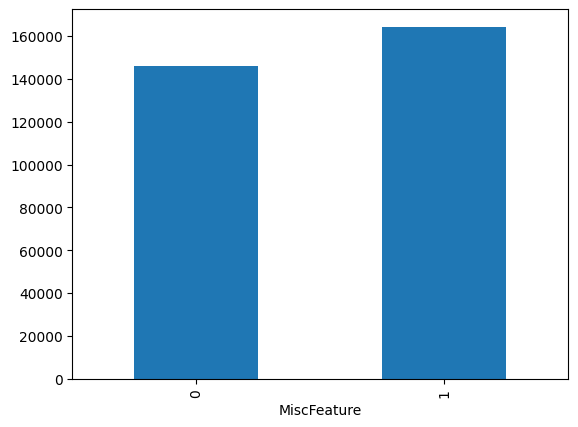

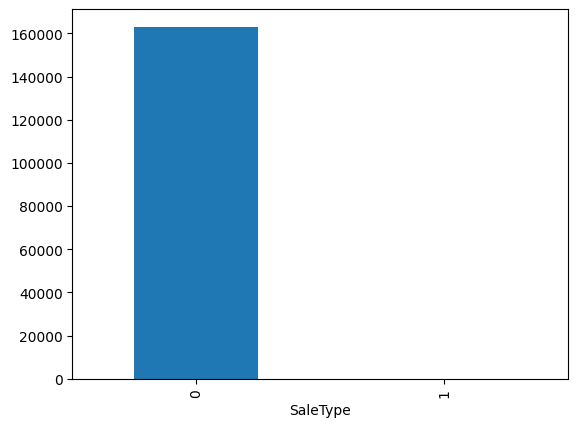

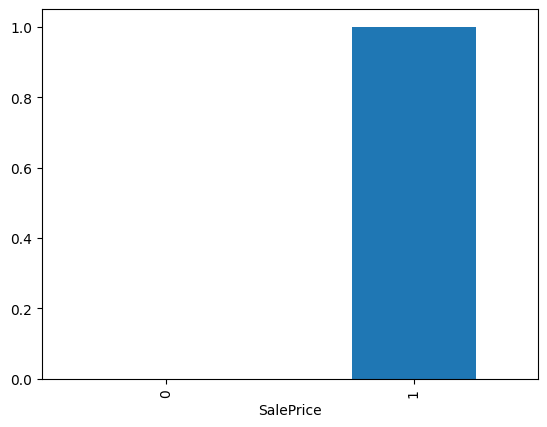

In [29]:
for feature in nd:
   dj=df.copy()
   dj[feature]=np.where(dj[feature].isnull(),1,0)
   dj.groupby(feature)['SalePrice'].median().plot.bar()
   plt.show()


These graphs show the median of Sale Price based on the null values and non null values.As you can see,Null values play an important part in determining SalePrices so we have to be careful in handling with them

In [30]:
nc=[feature for feature in nd if df[feature].dtype !='O' and feature != 'SalePrice']
do=df.copy()
i=0
c=np.zeros(81)
for feature in nc:
    c[i]=do[feature].median()
    do[feature]=do[feature].fillna(do[feature].median())
    i+=1    

We replace the null values of numerical features with their medians. 

In [31]:
nf=[feature for feature in nd if do[feature].dtype=='O']
for feature in nf:
    do[feature]=do[feature].fillna('Missing')


We replace null values of categorical values with the 'missing' category

### Exploratory Data Analysis

In [32]:
nh=[feature for feature in do.columns if do[feature].dtype!='O' and feature !='Id' and feature !='SalePrice']
ni=[feature for feature in do.columns if do[feature].dtype!='O' and feature !='Id']
yt=[feature for feature in nh if str(feature).__contains__("Year") or str(feature).__contains__("Yr")]
print(yt)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


We store year features in a variable.

In [33]:
dn=[feature for feature in nh if do[feature].unique().size < 25 and feature not in yt]
print(dn)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']


These values are discrete numericals,we store them in a separate variable than continuos variables.

In [34]:
ch=[feature for feature in nh if feature not in dn and feature not in yt]
print(ch)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


These values are continuous numericals,they are continuous with the Sale Price.

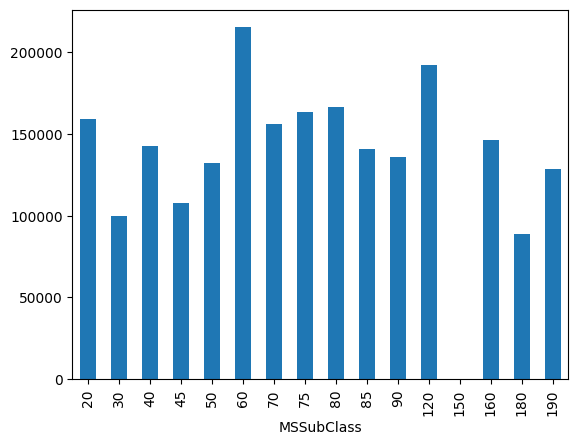

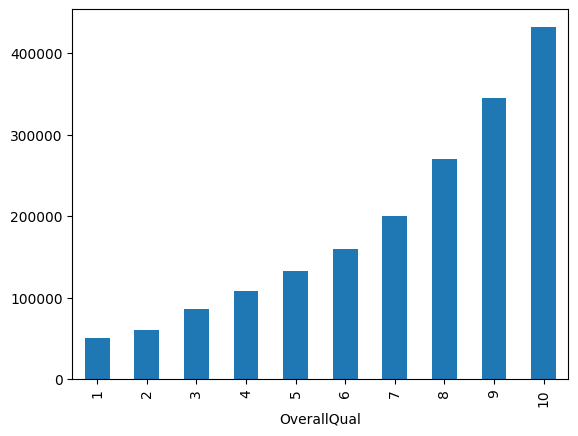

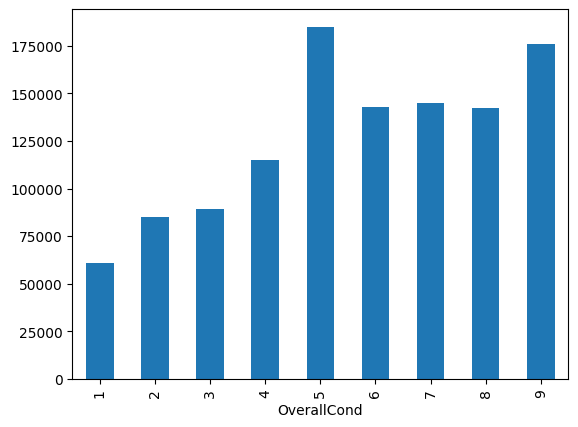

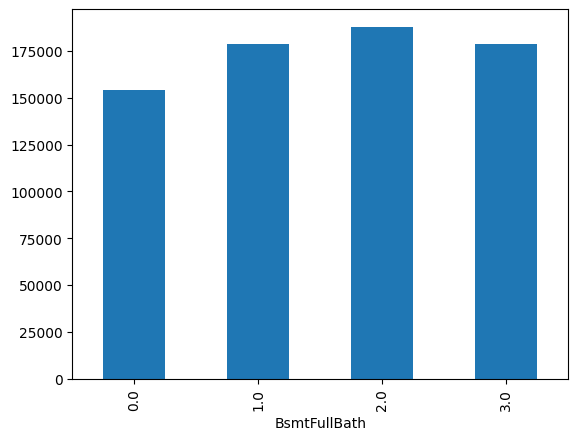

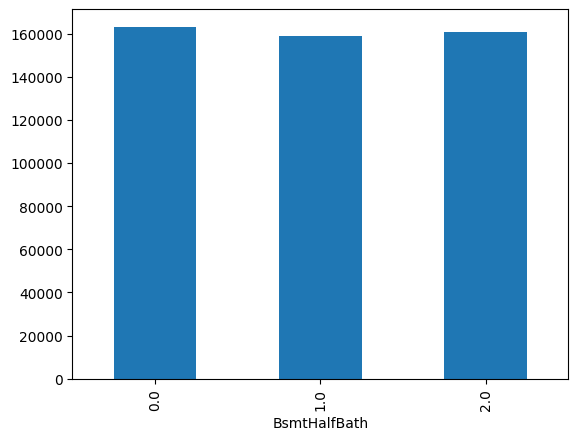

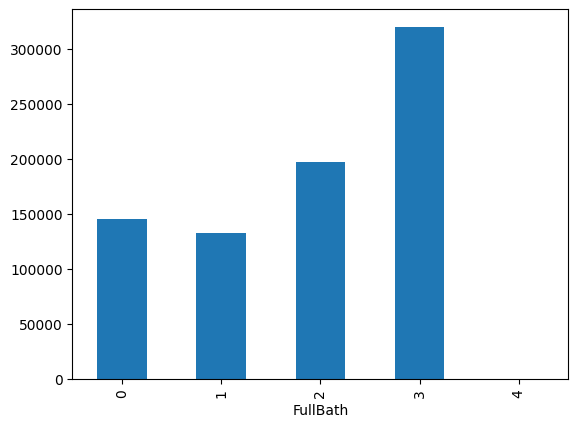

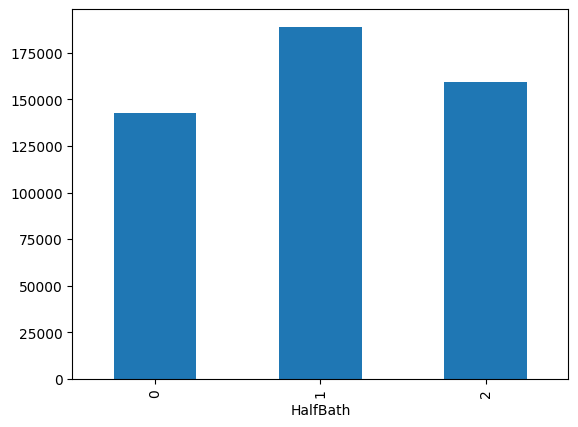

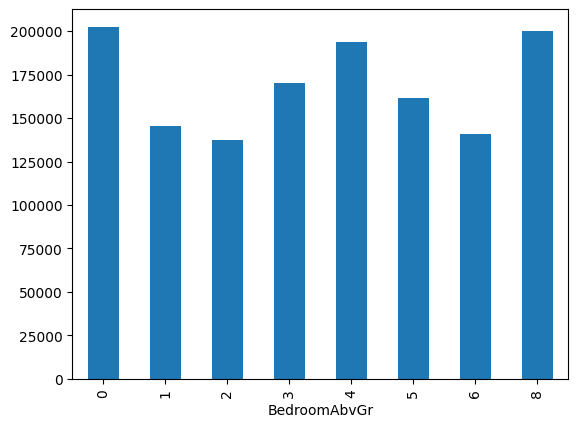

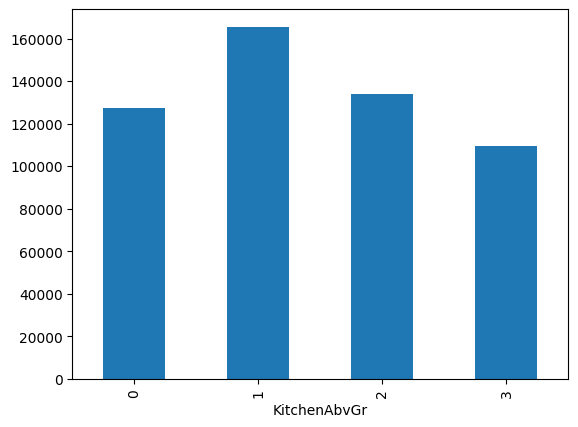

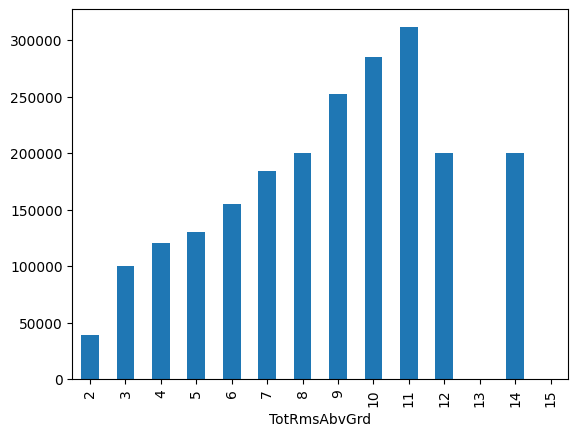

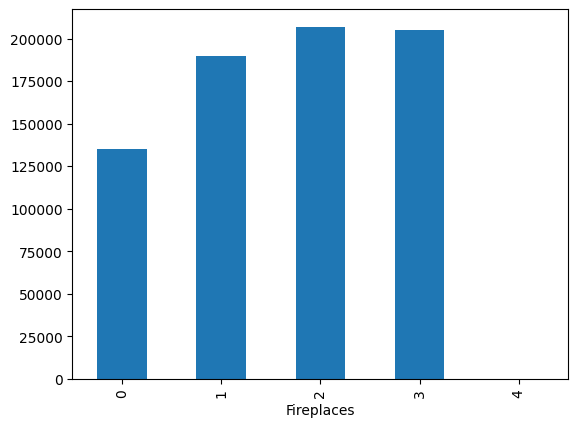

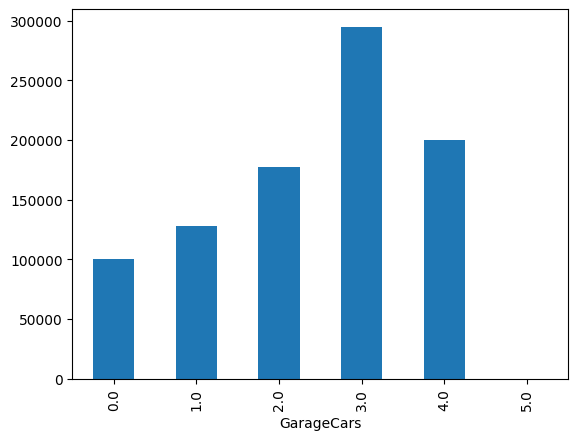

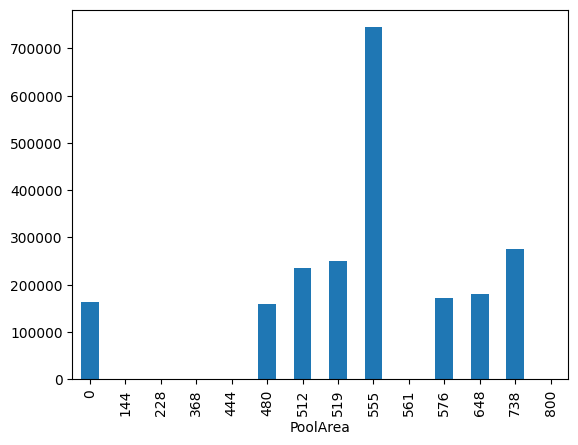

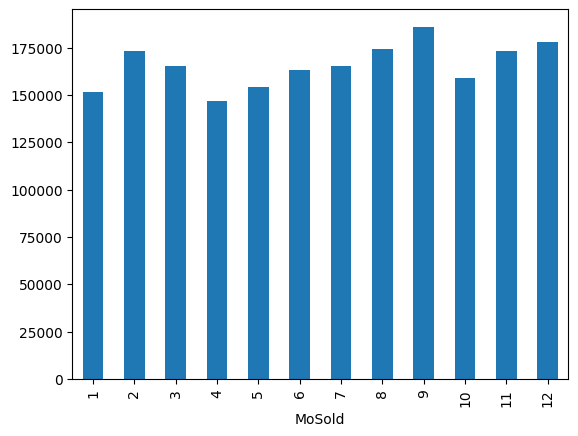

In [35]:
for feature in dn:
    dj=do.copy()
    dj.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()
        

The graphs gives us the median of Sale Price for each value of discrete numericals,we can clearly see a Linear Relationship with overall Quality and SalePrice,so we will be using OverallQual as a feature
We will also be using TotRmsAbvGrd,and FullBath as features as well.

LotFrontage


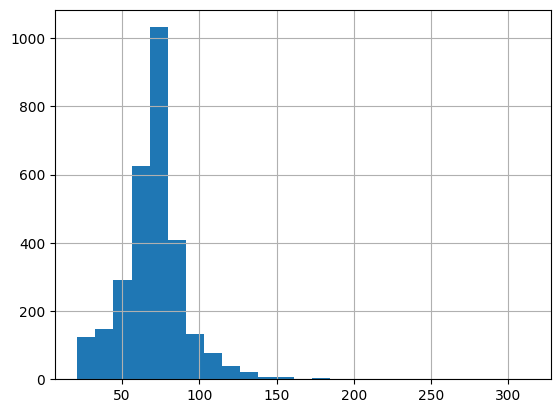

LotArea


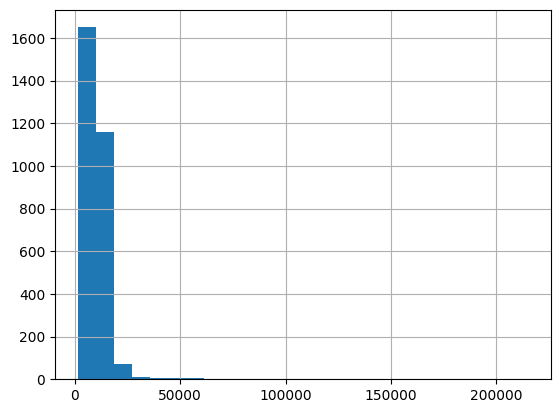

MasVnrArea


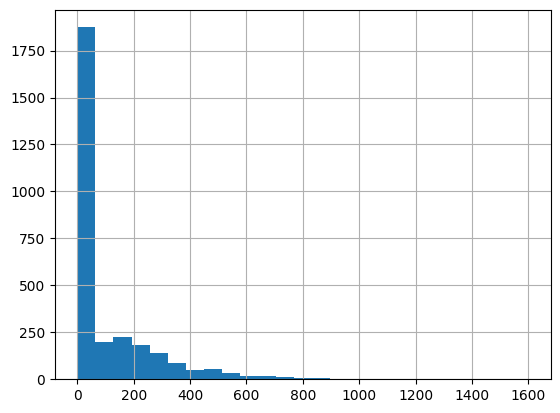

BsmtFinSF1


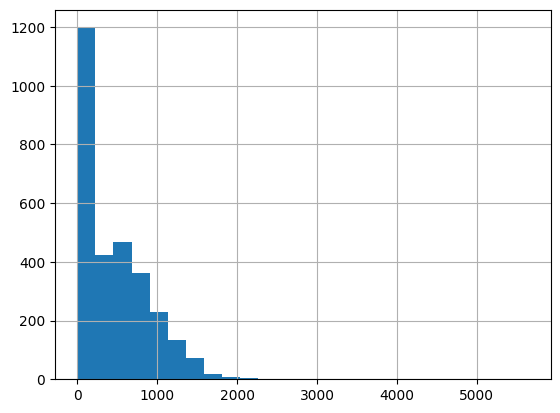

BsmtFinSF2


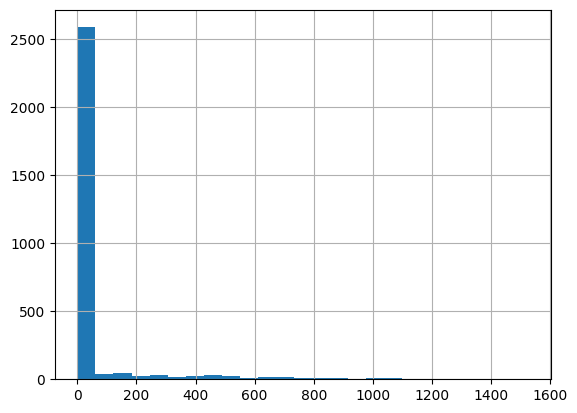

BsmtUnfSF


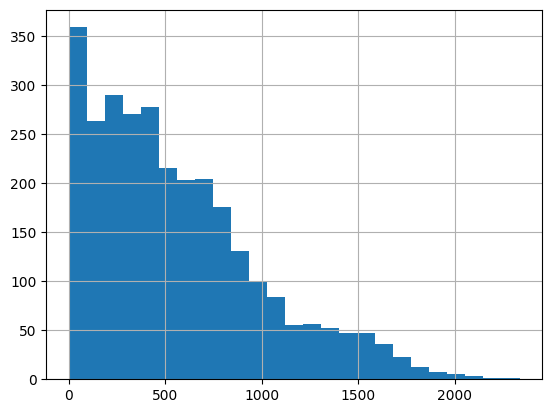

TotalBsmtSF


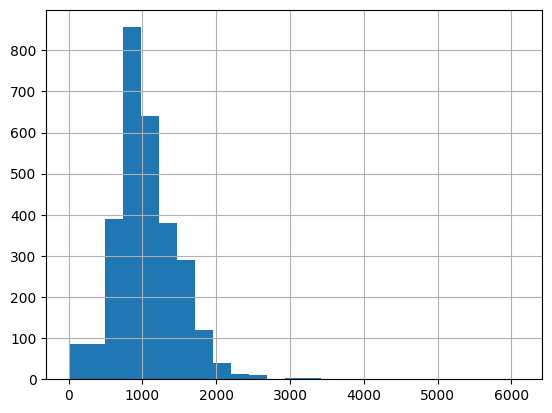

1stFlrSF


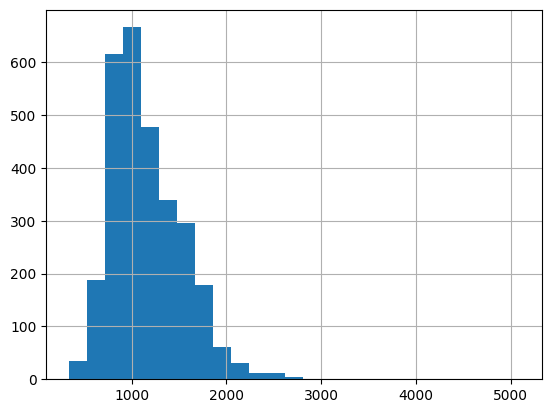

2ndFlrSF


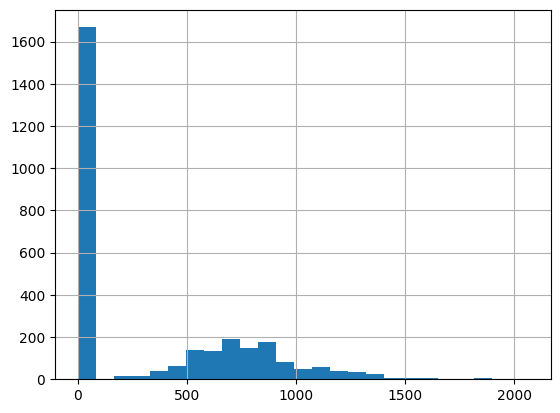

LowQualFinSF


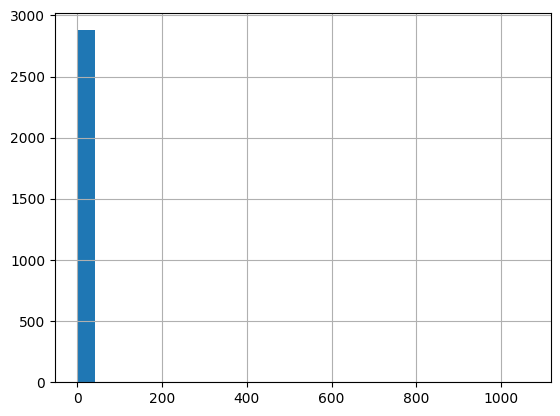

GrLivArea


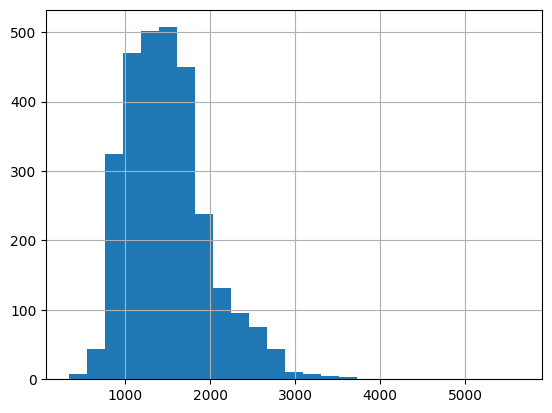

GarageArea


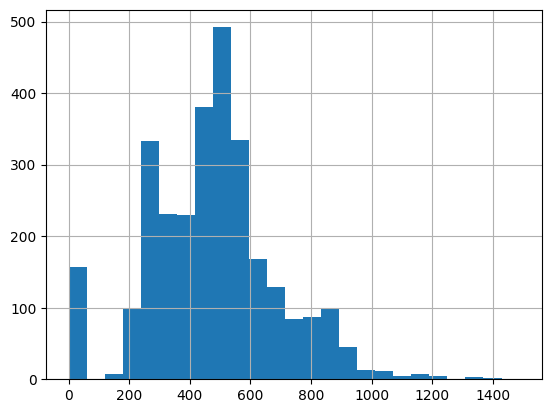

WoodDeckSF


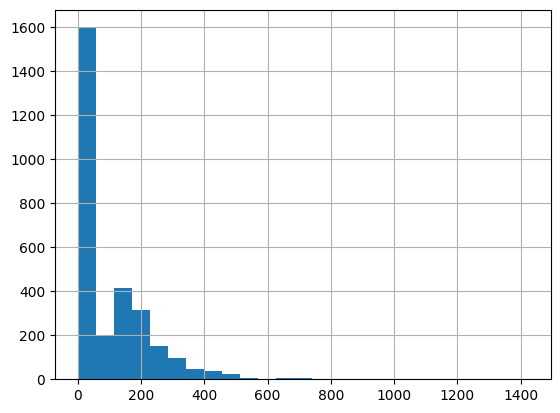

OpenPorchSF


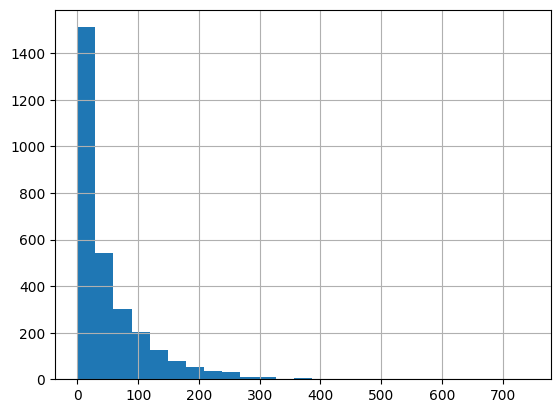

EnclosedPorch


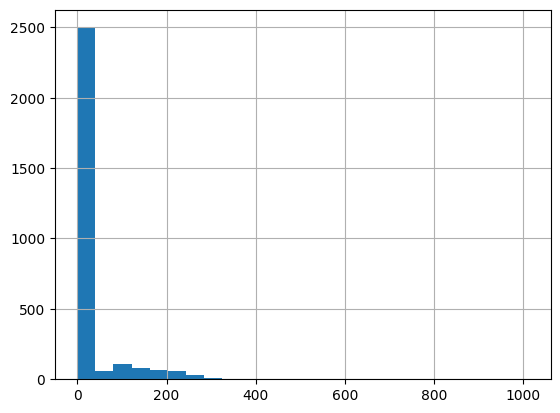

3SsnPorch


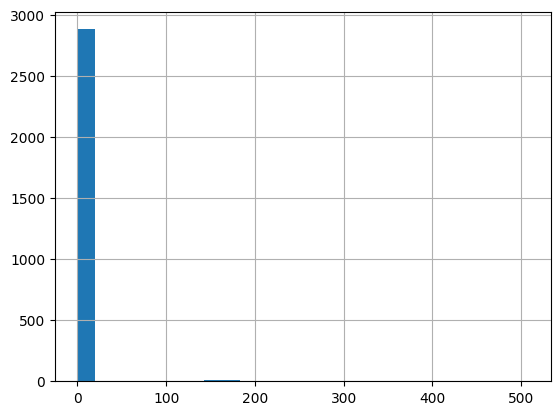

ScreenPorch


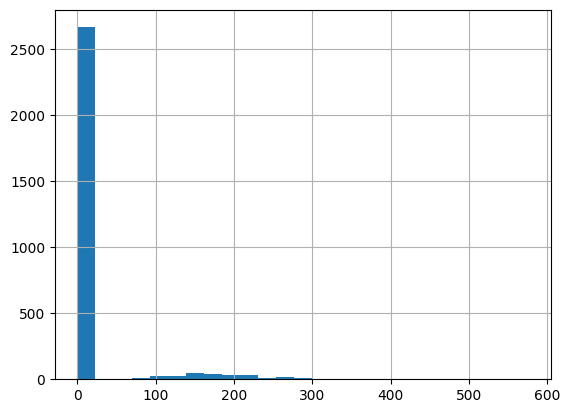

MiscVal


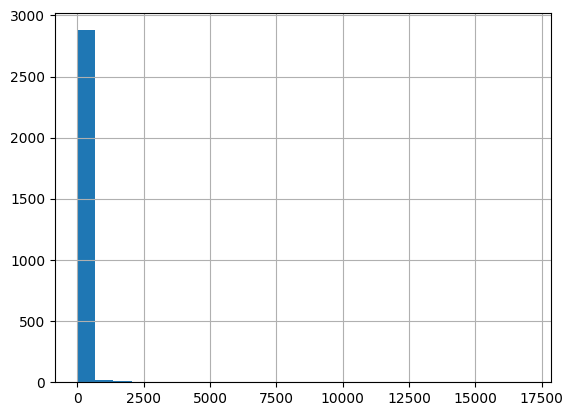

In [36]:
for feature in ch:
    de=do.copy()
    a=feature
    print(a)
    de[a].hist(bins=25)
    plt.show()

### OBSERVATION
Most histograms of Continuous Numericals are left Skewed,So to fix this we use logarithmic transform and scatterplot

LotFrontage


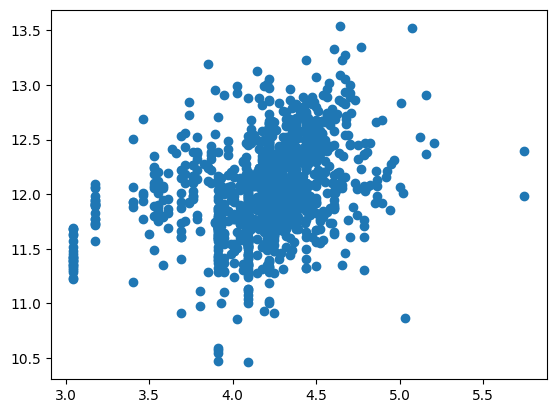

LotArea


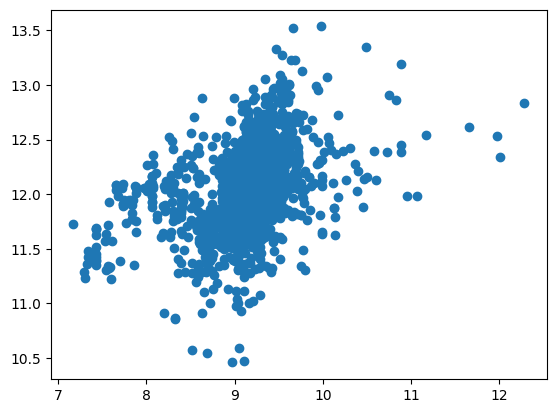

1stFlrSF


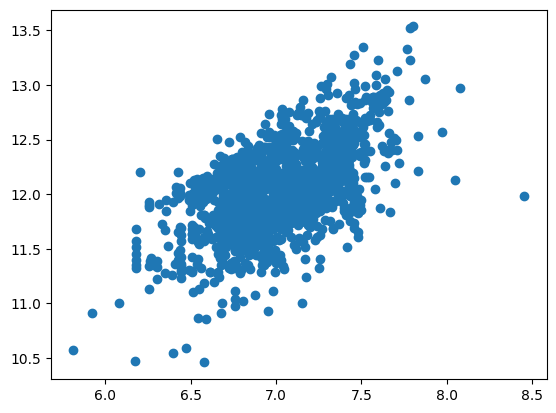

GrLivArea


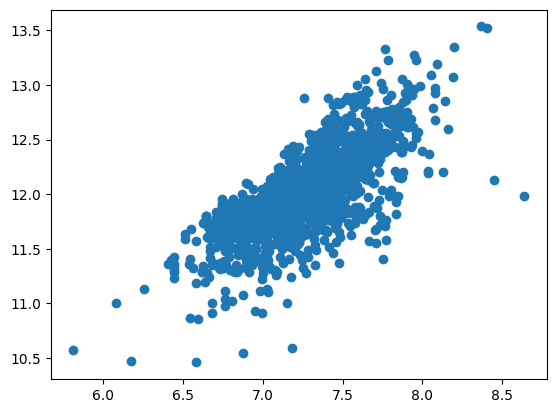

In [37]:
for feature in ch:
    de=do.copy()
    if 0 in de[feature].unique():
        pass
    else:
        de[feature]=np.log(de[feature])
        de['SalePrice']=np.log(de['SalePrice'])
        print(feature)
        plt.scatter(de[feature],de['SalePrice'])
        plt.show()

GrLivArea,1stFlrSf has a shape that seems to indicate a linear relationship with SalePrice so they are to be used as features.We don't use LotFrontage as a feature since it has many values in a straight line that will confuse the model.

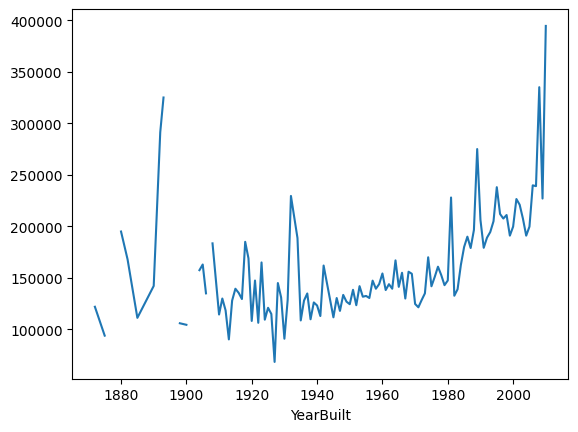

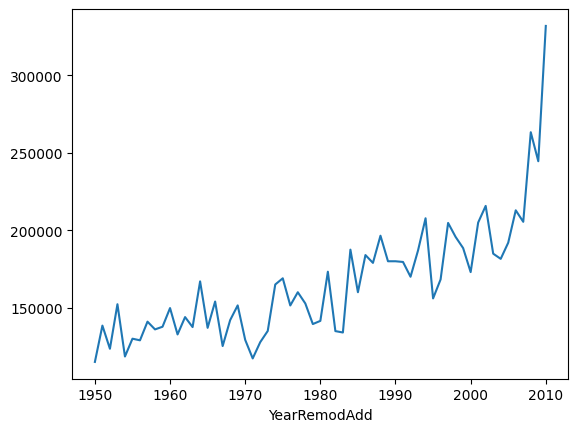

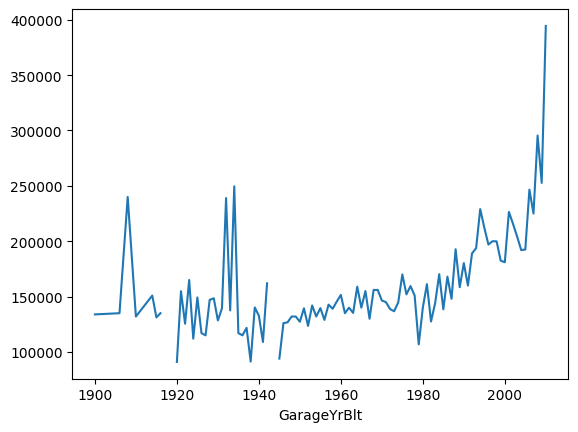

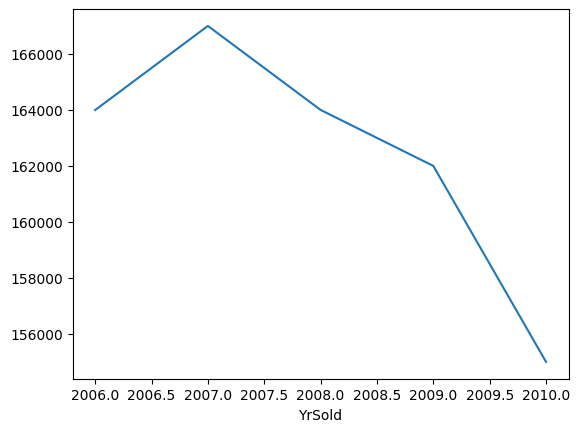

In [38]:
for feature in yt:
    de=do.copy()
    de.groupby(feature)['SalePrice'].median().plot()
    plt.show()

We create another set of Graphs based on Duration,ie,For how long the house has been built for,for how long the house has been Remodeled and for how long the garage has been added for before the sale

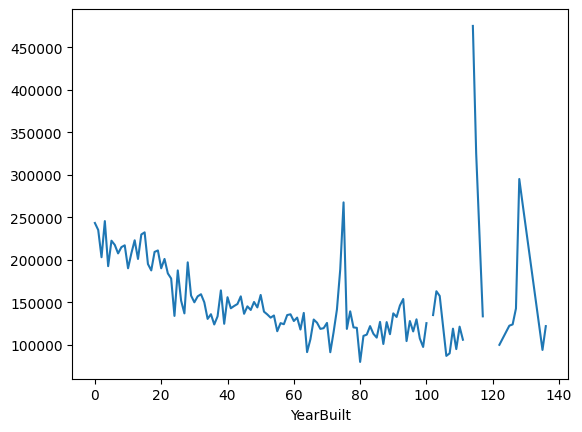

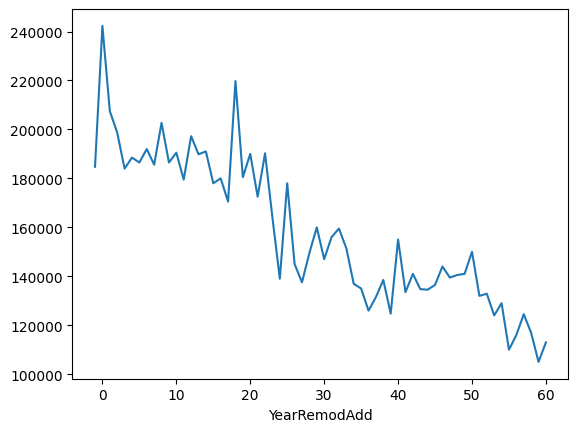

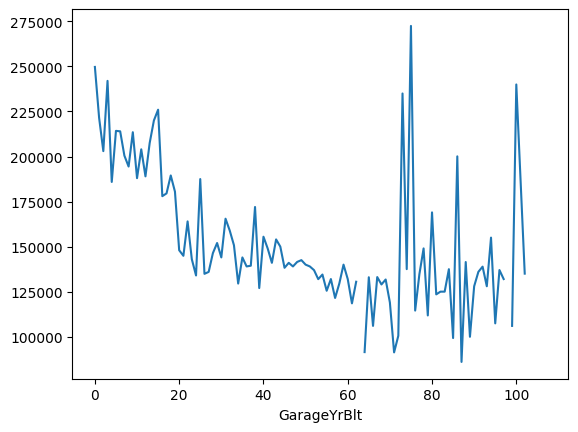

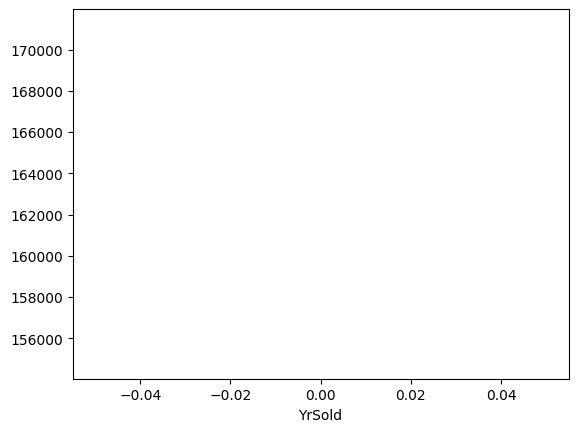

In [39]:
for feature in yt:
    dg=df.copy()
    dg[feature]=dg['YrSold']-dg[feature]
    dg.groupby(feature)['SalePrice'].median().plot()
    plt.show()

These graphs gives us the Sale Price corresponding to the age of the house,time the house went without remodellling, and age of the garage

In [40]:
do['DrOfHouse']=do['YrSold']-do['YearBuilt']
do['DrOfRemod']=do['YrSold']-do['YearRemodAdd']
do['DrOfGar']=do['YrSold']-do['GarageYrBlt']

In [41]:
cg=[feature for feature in do.columns if do[feature].dtype=='O']
print(cg)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Here are all the categorical features

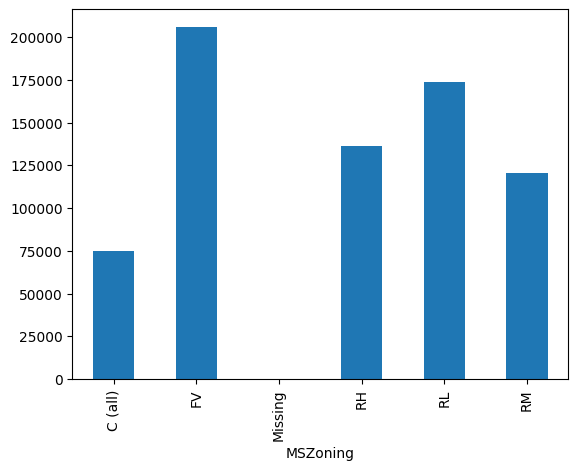

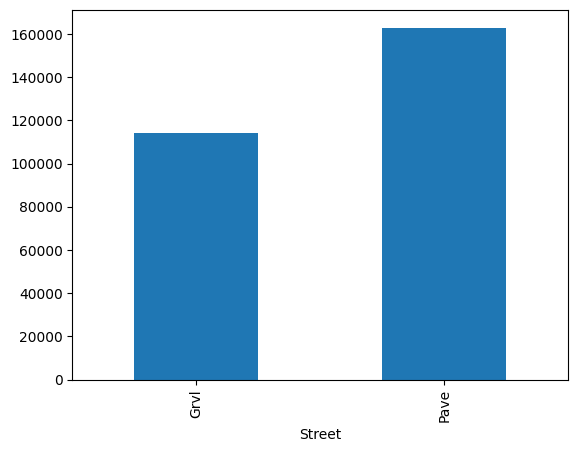

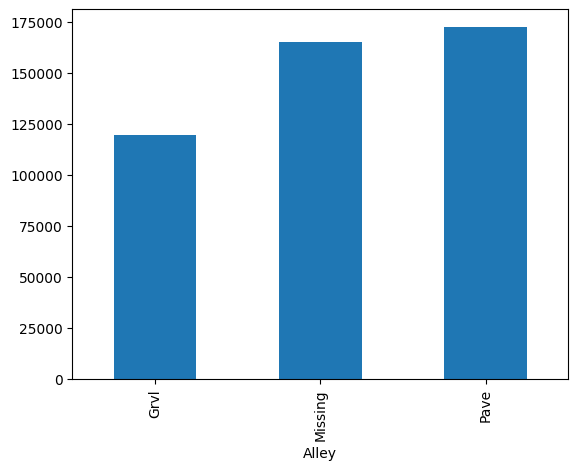

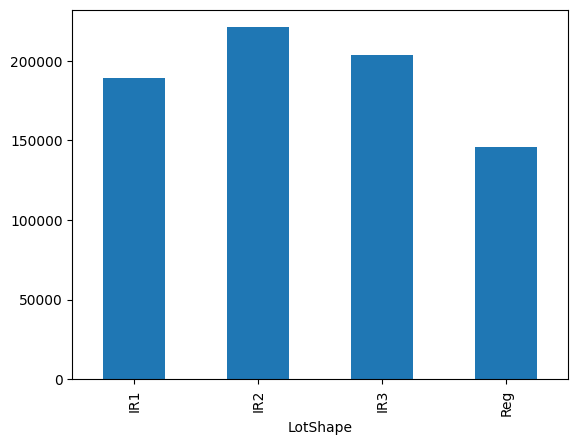

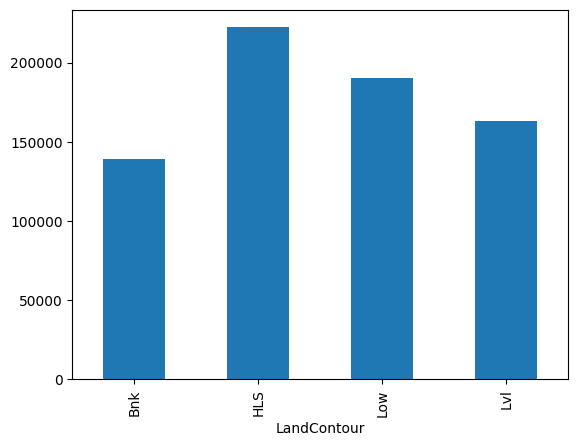

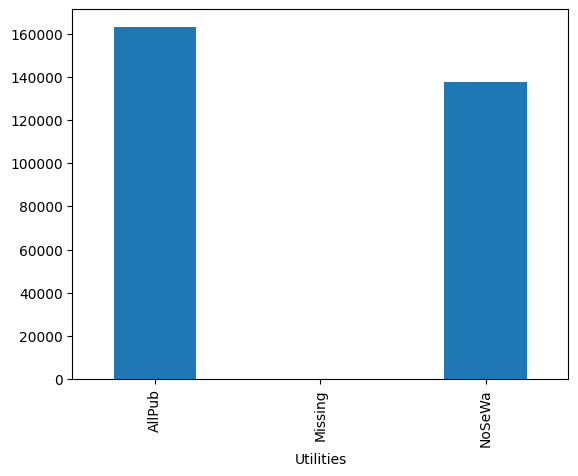

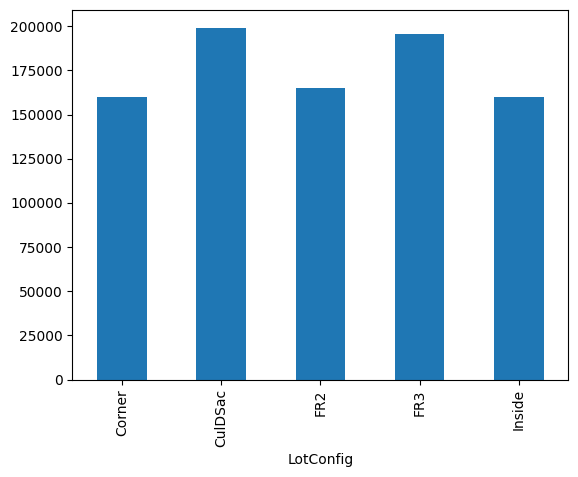

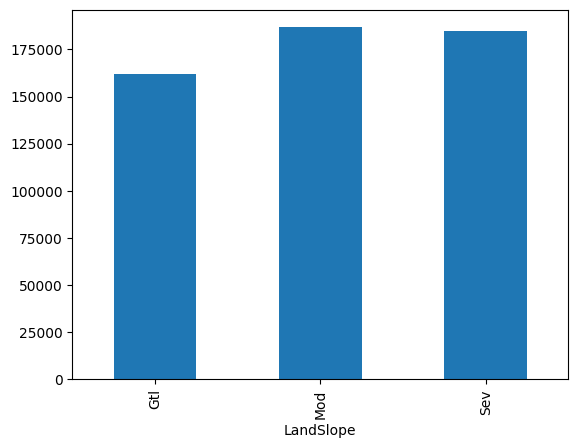

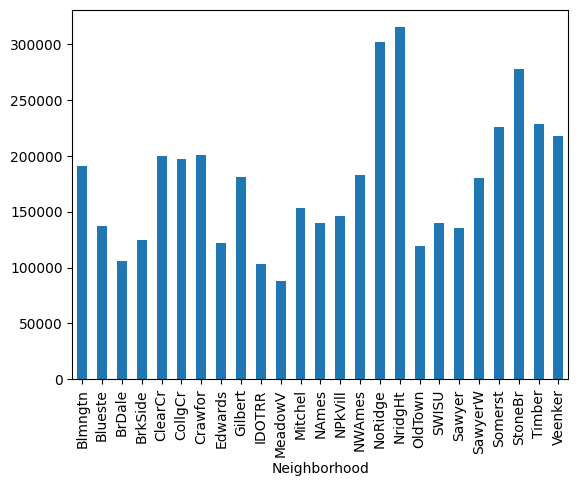

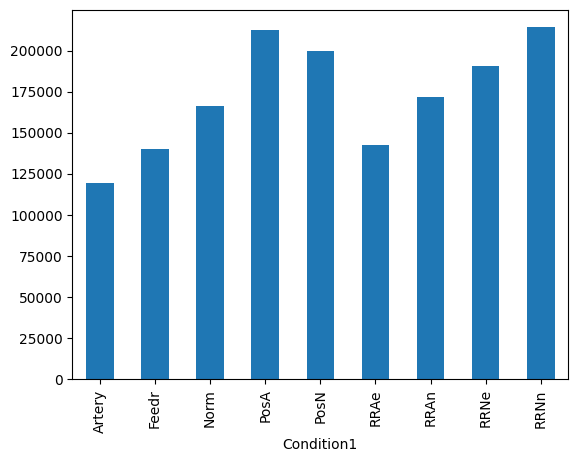

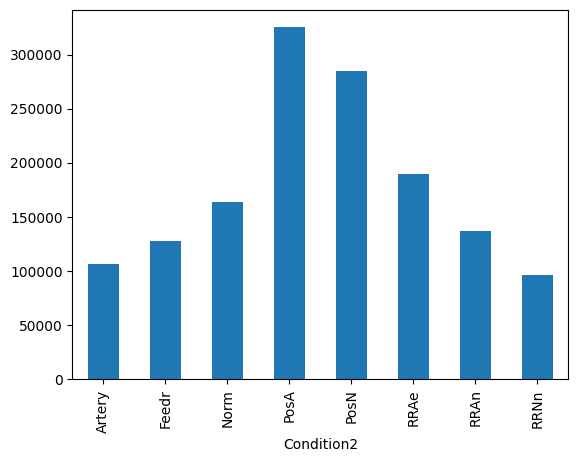

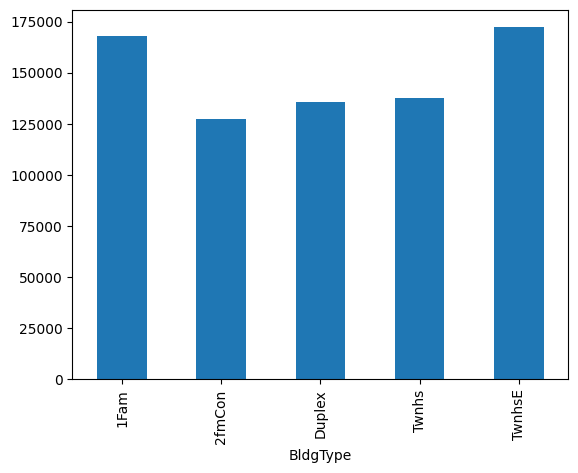

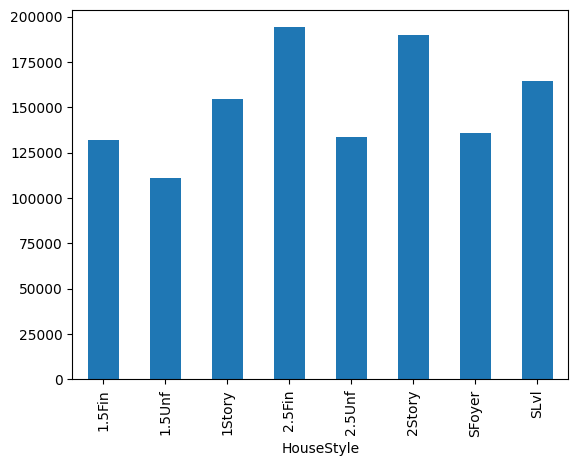

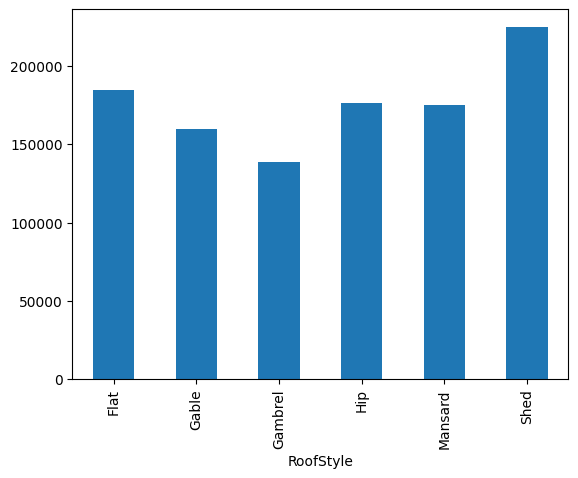

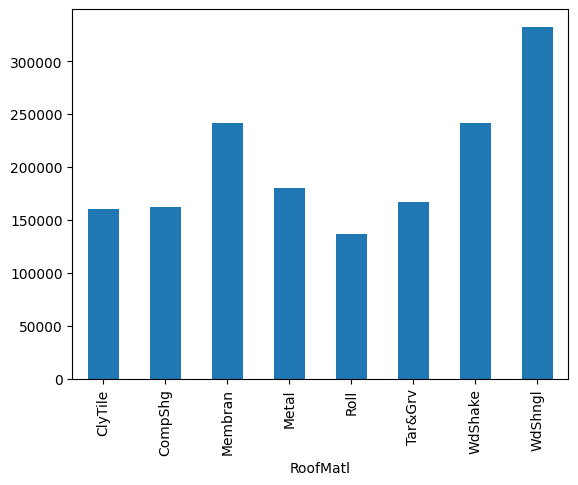

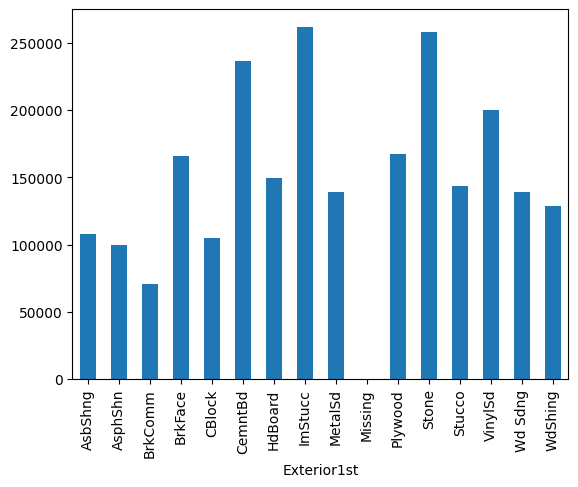

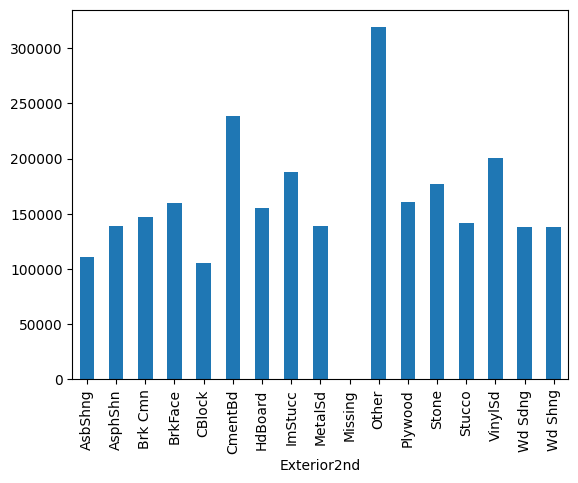

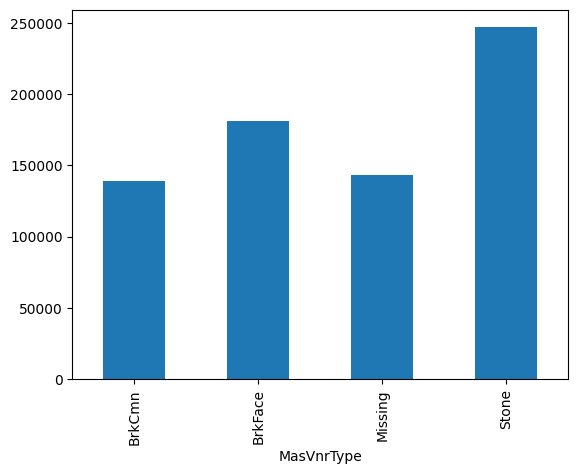

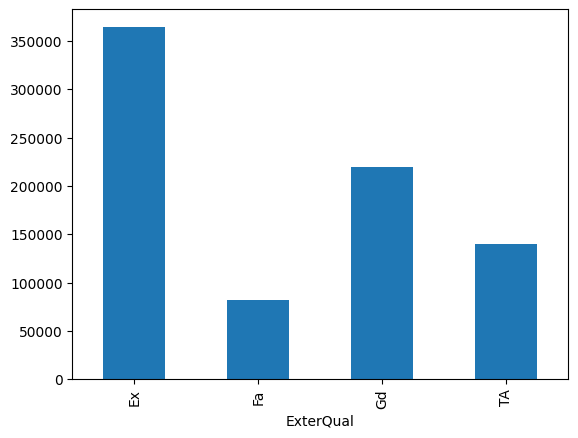

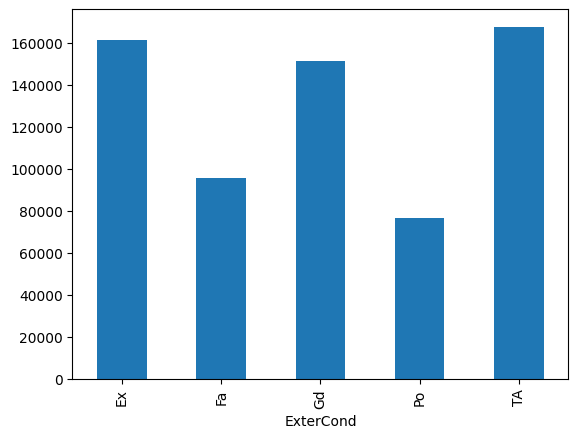

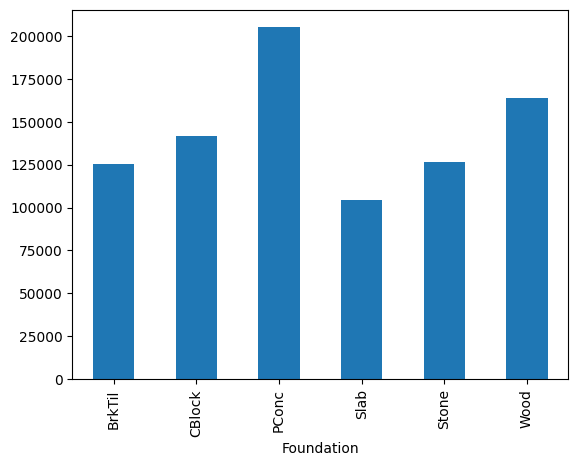

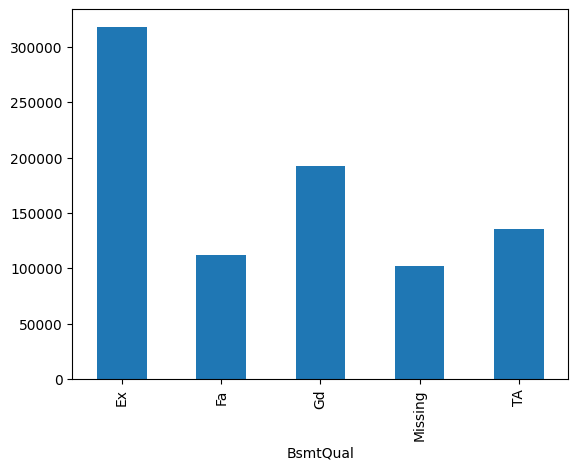

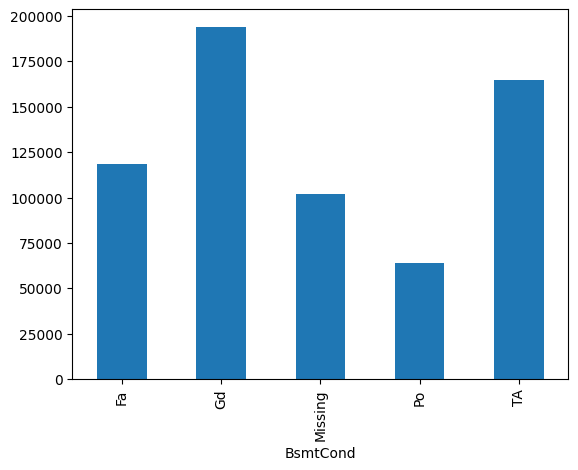

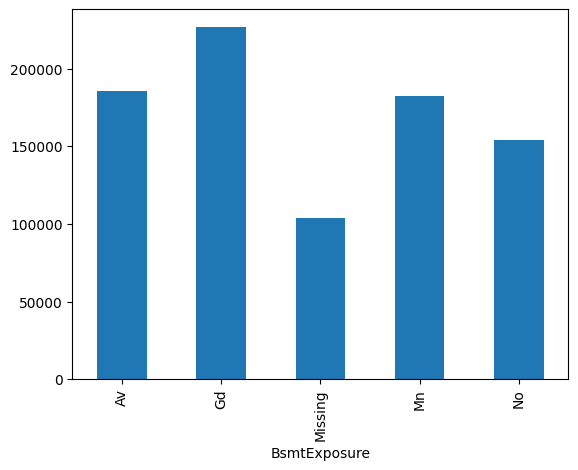

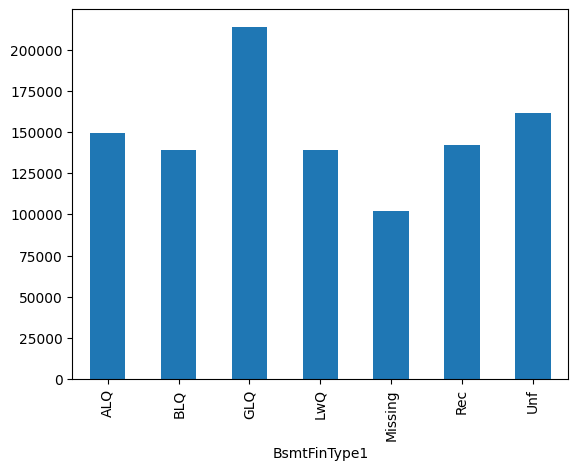

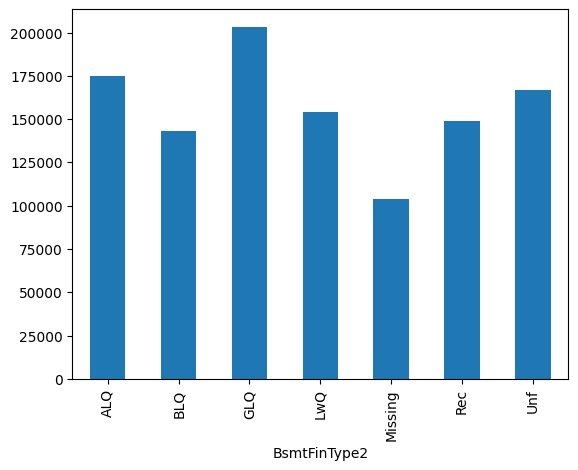

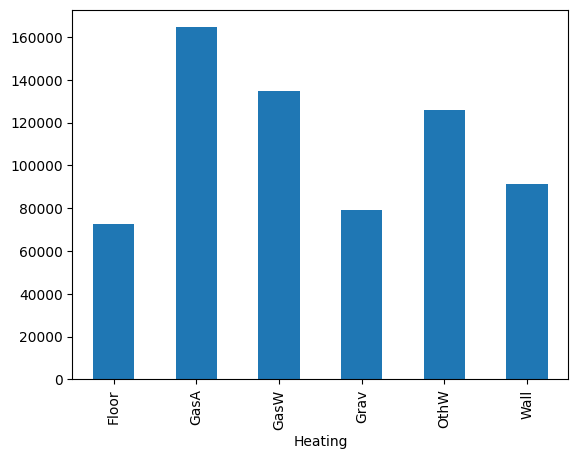

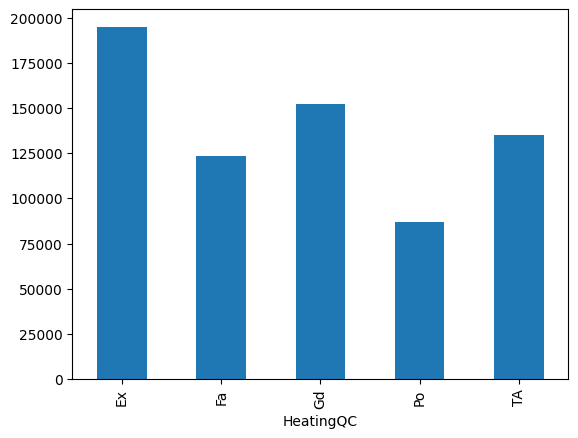

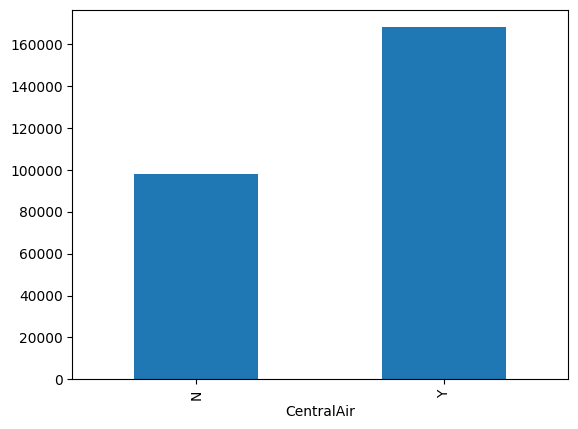

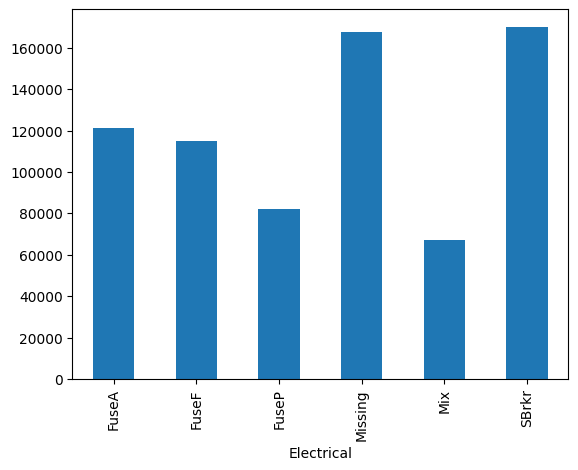

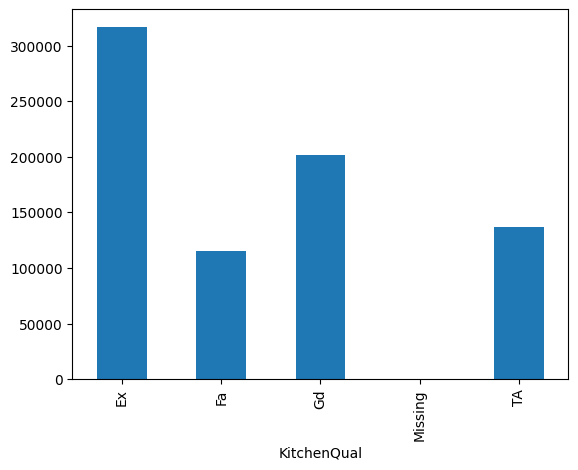

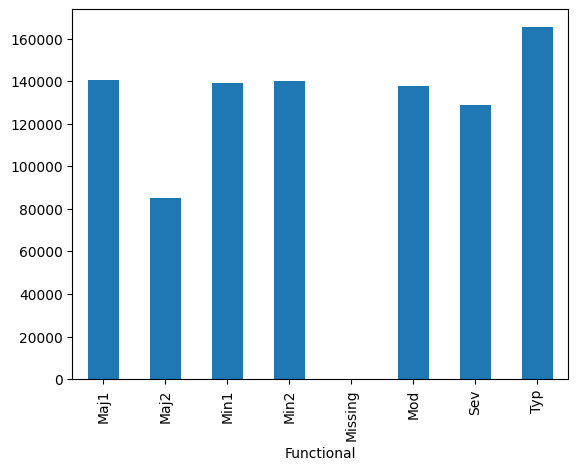

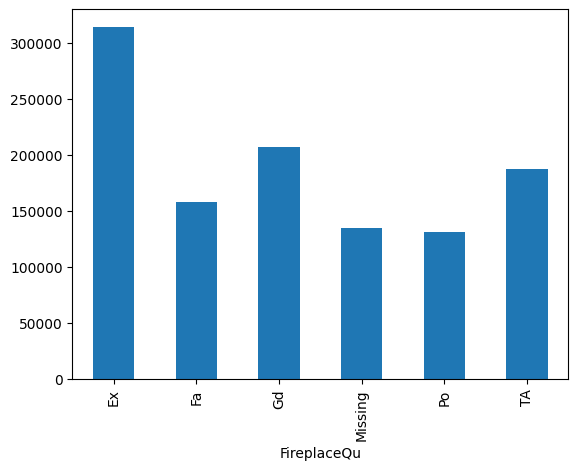

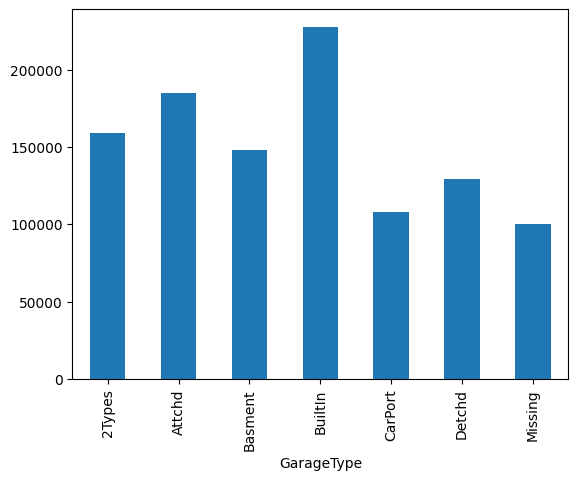

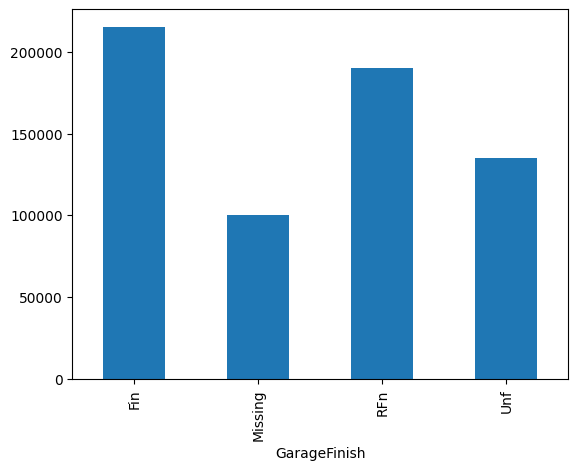

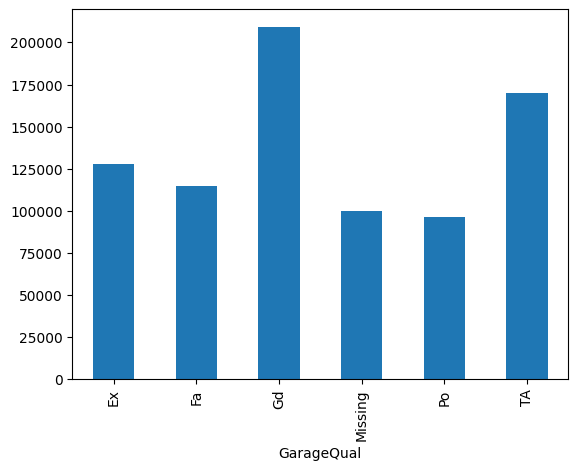

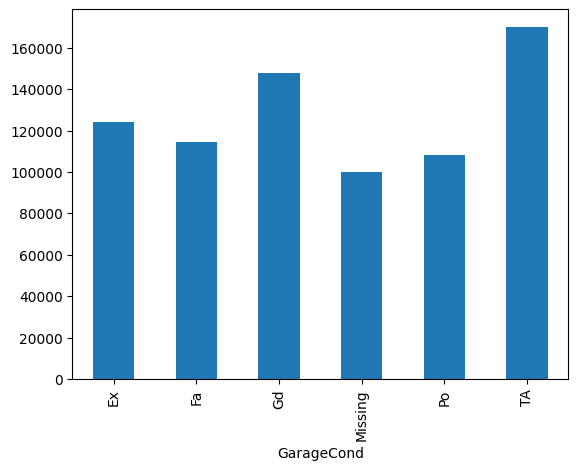

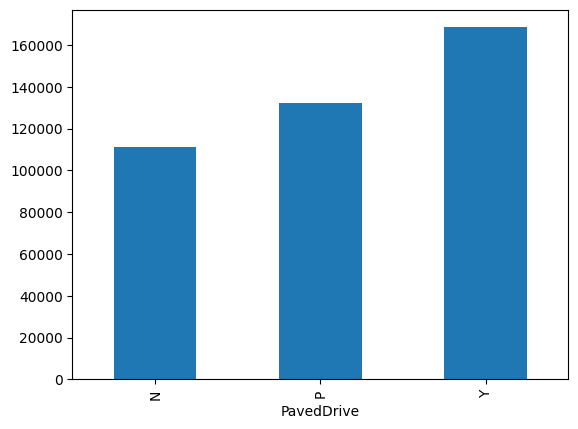

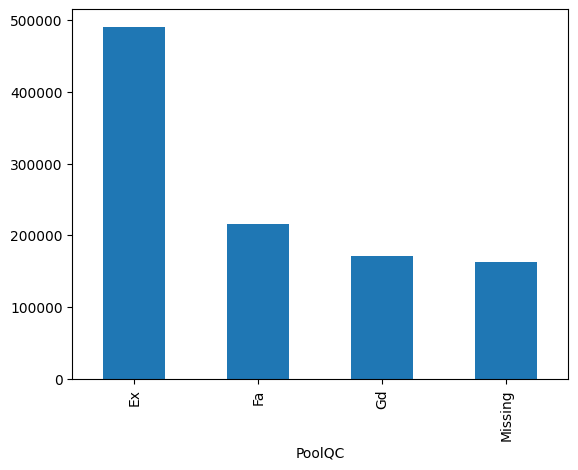

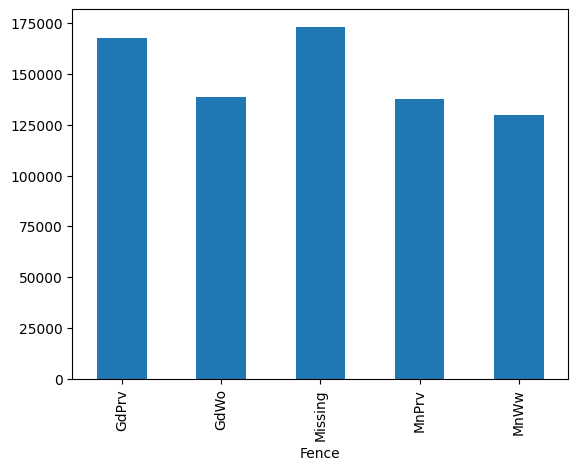

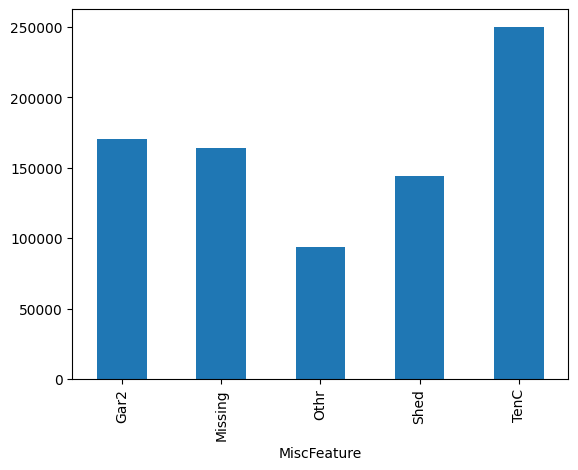

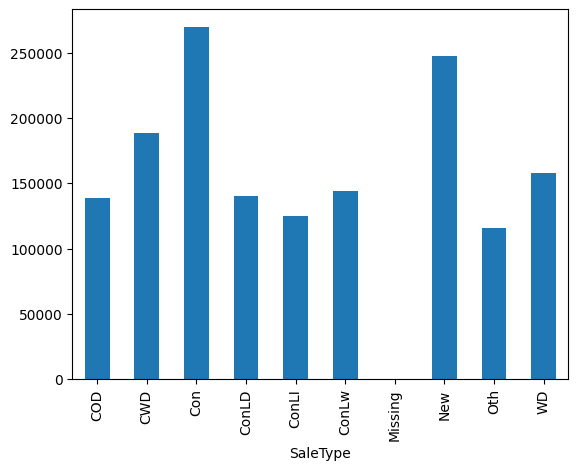

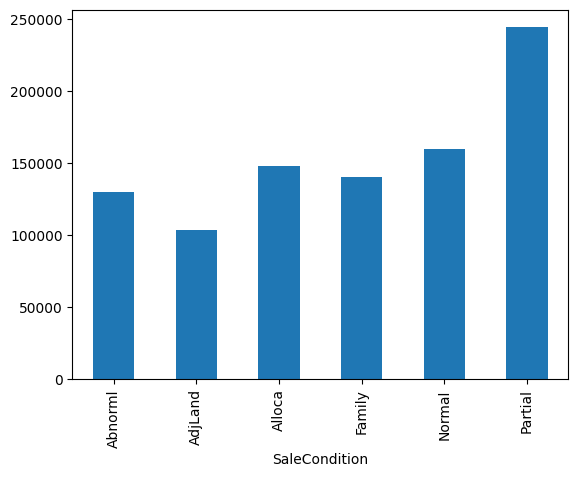

In [42]:
for feature in cg:
    dg=do.copy()
    dg.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

    

These graphs gives us Sale Price corresponding to each categorical values.From these categorical features,we will be using the ExterQual,BsmtQual,GarageQual,KitchenQual as they have a sort of linear relationship with SalePrice with their categories.

In [43]:
nh=[feature for feature in do.columns if do[feature].dtype!='O' and feature !='Id' and feature !='SalePrice']
ni=[feature for feature in do.columns if do[feature].dtype!='O' and feature !='Id']
print(do[ni].corr())

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.389469 -0.201730     0.033638    -0.065625   
LotFrontage     -0.389469     1.000000  0.361426     0.204215    -0.068118   
LotArea         -0.201730     0.361426  1.000000     0.100541    -0.035617   
OverallQual      0.033638     0.204215  0.100541     1.000000    -0.093847   
OverallCond     -0.065625    -0.068118 -0.035617    -0.093847     1.000000   
YearBuilt        0.034409     0.115498  0.024128     0.597554    -0.368477   
YearRemodAdd     0.043315     0.086049  0.021612     0.571532     0.047654   
MasVnrArea       0.006309     0.200474  0.124728     0.426528    -0.133118   
BsmtFinSF1      -0.064254     0.201697  0.194050     0.281784    -0.050474   
BsmtFinSF2      -0.072431     0.040330  0.084107    -0.042605     0.041359   
BsmtUnfSF       -0.125913     0.106921  0.021400     0.275178    -0.138255   
TotalBsmtSF     -0.219893     0.330765  0.254150     0.549157   

Here,We are able to see all the data correlations.So,to choose the best features to predict Sale Price,we look at its correlation with everything else.So we pick features which have more correlation with SalePrice.So FullBath,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,TotRmsAbvGrd,DrOfHouse,DrOfRemod,DrOfGar,MasVnarArea all have correlation above or around 50 with SalePrice so we will be using these features. 

So the features we will be using are 1stFlrSF,2ndFlrSF,GrLivArea,OverallQual,FullBath,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,TotRmsAbvGrd,DrOfHouse,DrOfRemod,DrOfGar,MasVnrArea,PoolQC,
SaleCondition,ExterQual,GarageQual,KitchenQual,BsmtQual

#### Scaling Features and Training the model

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
num=['1stFlrSF','2ndFlrSF','GrLivArea','OverallQual','FullBath','TotalBsmtSF','YearBuilt','YearRemodAdd','GarageCars','GarageArea','TotRmsAbvGrd','DrOfHouse','DrOfRemod','DrOfGar','MasVnrArea']
gj=['PoolQC','SaleCondition']
ik=['ExterQual','GarageQual','KitchenQual','BsmtQual']
fpl=ColumnTransformer([
    ("num",StandardScaler(),num),
    ("ik",OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),ik),
    ("gj",OneHotEncoder(handle_unknown='ignore'),gj)    
])
train=do[0:1460]
test=do[1460:2919]
pl=pn.read_csv('C:/Users/KIIT0001/Desktop/database/ki/test.csv')
pl['Bed/room Ratio']=pl['BedroomAbvGr']/pl['TotRmsAbvGrd']
x_train=train[['1stFlrSF','2ndFlrSF','GrLivArea','OverallQual','FullBath','TotalBsmtSF','YearBuilt','YearRemodAdd',
               'GarageCars','GarageArea','TotRmsAbvGrd','DrOfHouse','DrOfRemod','DrOfGar','PoolQC','SaleCondition','ExterQual',
               'GarageQual','KitchenQual','BsmtQual','MasVnrArea']]
y_train=train['SalePrice']
xt,xe,yt,ye=train_test_split(x_train,y_train,test_size=0.25,random_state=0)
xt=fpl.fit_transform(xt)
print(xt.shape)
rfg=RandomForestRegressor(max_features=9,n_estimators=99)
sv=SVR(C=879.0,kernel='linear')



(1095, 29)


We use a column transformer that allows us to scale each feature with a different scaler.We use Standard Scaler on numerical features,ordinal encoder on GarageQual,KitchenQual,BsmtQual,ExterQual and onehot encoder on Sale Condition and PoolQC.We use ordinal encoder on quality categories due to similarity in their categorical values and onehot encoder on the other categorical features.We also split the dataset again,However as the test set doesn't have any Sale Price values,we will be creating our own test set from the train set and use our model to predict the original test set's Sale Price

### Support Vector vs RandomTreeRegressor

In [45]:
from sklearn import metrics
sv.fit(xt,yt)
p=sv.predict(xt)
print(metrics.mean_absolute_error(yt,p))
csres=cross_val_score(sv,xt,yt,cv=10,scoring='neg_mean_absolute_error')
print(-csres)
print(-csres.mean(),csres.std())
rfg.fit(xt,yt)
p=rfg.predict(xt)
print(metrics.mean_absolute_error(yt,p))
csres=cross_val_score(rfg,xt,yt,cv=10,scoring='neg_mean_absolute_error')
print(-csres)
print(-csres.mean(),csres.std())

21147.78209127471
[21102.6078585  21892.93482325 23605.08138599 24541.53859612
 21772.59593211 24384.61827345 22443.80346221 19868.43467734
 20370.79546696 17893.5649521 ]
21787.59754280358 1984.870213182871
7111.841852313085
[18039.55022957 17997.17502296 23280.34040404 19439.82607897
 18980.4164371  19438.65452692 21481.94541748 16486.656751
 17966.61977574 16077.7304235 ]
18918.89150672699 2065.293673831814


Here we use K-Cross Fold Validation Process to check if the model is overfitting or not.
While The Support Vector doesnt overfit as much as Random Forest Regressor,It still provides a higher error than Random Forest Regressor

In [46]:
xe=fpl.transform(xe)
p=rfg.predict(xe)
print(metrics.mean_absolute_error(ye,p))


18613.10510585305


This is the mean absolute error our model can make.So the error generated by our model is around 18854.

In [47]:
x_test=test[['1stFlrSF','2ndFlrSF','GrLivArea','OverallQual','FullBath','TotalBsmtSF','YearBuilt','YearRemodAdd',
             'GarageCars','GarageArea','TotRmsAbvGrd','DrOfHouse','DrOfRemod','DrOfGar','PoolQC','SaleCondition','ExterQual',
             'GarageQual','KitchenQual','BsmtQual','MasVnrArea']]
x_test=fpl.transform(x_test)
p=rfg.predict(x_test)
print(p)

[125605.28282828 150863.13131313 176134.76767677 ... 142406.57575758
 105528.78787879 220978.77777778]
